## Problem Statement

Explore football skills and cluster football players based on their attributes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('players_20.csv')
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [4]:
data.shape

(18278, 104)

In [5]:
pd.set_option('display.max_rows',None)
data.describe().T

count          mean           std      min  \
sofifa_id                   18278.0  2.197389e+05  2.796020e+04    768.0   
age                         18278.0  2.528329e+01  4.656964e+00     16.0   
height_cm                   18278.0  1.813622e+02  6.756961e+00    156.0   
weight_kg                   18278.0  7.527634e+01  7.047744e+00     50.0   
overall                     18278.0  6.624499e+01  6.949953e+00     48.0   
potential                   18278.0  7.154689e+01  6.139669e+00     49.0   
value_eur                   18278.0  2.484038e+06  5.585481e+06      0.0   
wage_eur                    18278.0  9.456943e+03  2.135171e+04      0.0   
international_reputation    18278.0  1.103184e+00  3.788605e-01      1.0   
weak_foot                   18278.0  2.944250e+00  6.646562e-01      1.0   
skill_moves                 18278.0  2.368038e+00  7.650376e-01      1.0   
release_clause_eur          16980.0  4.740717e+06  1.103002e+07  13000.0   
team_jersey_number          18038.0  2.010389e+01  1.660364e+01      1.0   
contract_valid_until        18038.0  2.021115e+03  1.289888e+00   2019.0   
nation_jersey_number         1126.0  1.211456e+01  6.735922e+00      1.0   
pace                        16242.0  6.770090e+01  1.129766e+01     24.0   
shooting                    16242.0  5.229830e+01  1.402942e+01     15.0   
passing                     16242.0  5.723378e+01  1.040784e+01     24.0   
dribbling                   16242.0  6.253158e+01  1.028495e+01     23.0   
defending                   16242.0  5.155350e+01  1.641953e+01     15.0   
physic                      16242.0  6.487668e+01  9.760162e+00     27.0   
gk_diving                    2036.0  6.542240e+01  7.736278e+00     44.0   
gk_handling                  2036.0  6.314637e+01  7.244023e+00     42.0   
gk_kicking                   2036.0  6.183251e+01  7.510709e+00     35.0   
gk_reflexes                  2036.0  6.639047e+01  8.154062e+00     45.0   
gk_speed                     2036.0  3.779862e+01  1.063404e+01     12.0   
gk_positioning               2036.0  6.337475e+01  8.447876e+00     41.0   
attacking_crossing          18278.0  4.971840e+01  1.832540e+01      5.0   
attacking_finishing         18278.0  4.559022e+01  1.959461e+01      2.0   
attacking_heading_accuracy  18278.0  5.222147e+01  1.742843e+01      5.0   
attacking_short_passing     18278.0  5.874800e+01  1.467965e+01      7.0   
attacking_volleys           18278.0  4.280939e+01  1.770182e+01      3.0   
skill_dribbling             18278.0  5.559651e+01  1.892912e+01      4.0   
skill_curve                 18278.0  4.732569e+01  1.842299e+01      6.0   
skill_fk_accuracy           18278.0  4.270888e+01  1.743361e+01      4.0   
skill_long_passing          18278.0  5.276885e+01  1.524645e+01      8.0   
skill_ball_control          18278.0  5.846198e+01  1.674188e+01      5.0   
movement_acceleration       18278.0  6.429992e+01  1.504223e+01     12.0   
movement_sprint_speed       18278.0  6.441575e+01  1.484776e+01     11.0   
movement_agility            18278.0  6.350492e+01  1.480838e+01     11.0   
movement_reactions          18278.0  6.175254e+01  9.135613e+00     21.0   
movement_balance            18278.0  6.385644e+01  1.420156e+01     12.0   
power_shot_power            18278.0  5.818169e+01  1.332608e+01     14.0   
power_jumping               18278.0  6.492817e+01  1.193406e+01     19.0   
power_stamina               18278.0  6.288948e+01  1.601795e+01     12.0   
power_strength              18278.0  6.523476e+01  1.253481e+01     20.0   
power_long_shots            18278.0  4.681294e+01  1.932234e+01      4.0   
mentality_aggression        18278.0  5.574215e+01  1.731816e+01      9.0   
mentality_interceptions     18278.0  4.638024e+01  2.077581e+01      3.0   
mentality_positioning       18278.0  5.007216e+01  1.959402e+01      2.0   
mentality_vision            18278.0  5.360975e+01  1.395563e+01      9.0   
mentality_penalties         18278.0  4.838336e+01  1.570810e+01      7.0   
me

In [6]:
# Statastical information of categorical data
data.describe(include='O').T

count unique  \
player_url        18278  18278   
short_name        18278  17354   
long_name         18278  18218   
dob               18278   6142   
nationality       18278    162   
club              18278    698   
player_positions  18278    643   
preferred_foot    18278      2   
work_rate         18278      9   
body_type         18278     10   
real_face         18278      2   
player_tags        1499     83   
team_position     18038     29   
loaned_from        1048    316   
joined            16990   1760   
nation_position    1126     26   
player_traits      7566    921   
ls                16242     94   
st                16242     94   
rs                16242     94   
lw                16242    107   
lf                16242    103   
cf                16242    103   
rf                16242    103   
rw                16242    107   
lam               16242    103   
cam               16242    103   
ram               16242    103   
lm                16242    100   
lcm               16242     88   
cm                16242     88   
rcm               16242     88   
rm                16242    100   
lwb               16242     98   
ldm               16242     98   
cdm               16242     98   
rdm               16242     98   
rwb               16242     98   
lb                16242     96   
lcb               16242    110   
cb                16242    110   
rcb               16242    110   
rb                16242     96   

                                                                top   freq  
player_url        https://sofifa.com/player/158023/lionel-messi/...      1  
short_name                                             J. Rodríguez     11  
long_name                                                Liam Kelly      3  
dob                                                      1992-02-29    113  
nationality                                                 England   1667  
club                                                   FC Barcelona     33  
player_positions                                                 CB   2322  
preferred_foot                                                Right  13960  
work_rate                                             Medium/Medium   9875  
body_type                                                    Normal  10750  
real_face                                                        No  16310  
player_tags                                               #Strength    514  
team_position                                                   SUB   7820  
loaned_from                                                Sassuolo     17  
joined                                                   2019-07-01   1465  
nation_position                                                 SUB    587  
player_traits                                         Early Crosser    501  
ls                                                             61+2    725  
st                                                             61+2    725  
rs                                                             61+2    725  
lw                                                             63+2    736  
lf                                                             63+2    727  
cf                                                             63+2    727  
rf                                                             63+2    727  
rw                                                             63+2    736  
lam                                                            61+2    748  
cam                                                            61+2    748  
ram                                                            61+2    748  
lm                                                             61+2    809  
lcm                                                            58+2    775  
cm                                                             58+2    775  
rcm                                                      

In [7]:
# Remove the '+' with the values after them.
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
data[columns]

for colmun in columns:
    data[colmun] = data[colmun].str.split('+',expand=True)[0]

In [8]:
pd.set_option('display.max_columns',None)
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

Total 104 columns so for better understand data divided into numerical and categorical.

In [9]:
numerical_columns=data.select_dtypes('number')
numerical_columns.head()

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0     158023   32        170         72       94         94   95500000   
1      20801   34        187         83       93         93   58500000   
2     190871   27        175         68       92         92  105500000   
3     200389   26        188         87       91         93   77500000   
4     183277   28        175         74       91         91   90000000   

   wage_eur  international_reputation  weak_foot  skill_moves  \
0    565000                         5          4            4   
1    405000                         5          4            5   
2    290000                         5          5            5   
3    125000                         3          3            1   
4    470000                         4          4            4   

   release_clause_eur  team_jersey_number  contract_valid_until  \
0         195800000.0                10.0                2021.0   
1          96500000.0                 7.0                2022.0   
2         195200000.0                10.0                2022.0   
3         164700000.0                13.0                2023.0   
4         184500000.0                 7.0                2024.0   

   nation_jersey_number  pace  shooting  passing  dribbling  defending  \
0                   NaN  87.0      92.0     92.0       96.0       39.0   
1                   7.0  90.0      93.0     82.0       89.0       35.0   
2                  10.0  91.0      85.0     87.0       95.0       32.0   
3                   1.0   NaN       NaN      NaN        NaN        NaN   
4                  10.0  91.0      83.0     86.0       94.0       35.0   

   physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0    66.0        NaN          NaN         NaN          NaN       NaN   
1    78.0        NaN          NaN         NaN          NaN       NaN   
2    58.0        NaN          NaN         NaN          NaN       NaN   
3     NaN       87.0         92.0        78.0         89.0      52.0   
4    66.0        NaN          NaN         NaN          NaN       NaN   

   gk_positioning  attacking_crossing  attacking_finishing  \
0             NaN                  88                   95   
1             NaN                  84                   94   
2             NaN                  87                   87   
3            90.0                  13                   11   
4             NaN                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94                     94                     88   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87 

In [10]:
categorical_columns=data.select_dtypes('object')
categorical_columns.head()

player_url         short_name  \
0  https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1  https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2  https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
3  https://sofifa.com/player/200389/jan-oblak/20/...           J. Oblak   
4  https://sofifa.com/player/183277/eden-hazard/2...          E. Hazard   

                             long_name         dob nationality  \
0       Lionel Andrés Messi Cuccittini  1987-06-24   Argentina   
1  Cristiano Ronaldo dos Santos Aveiro  1985-02-05    Portugal   
2        Neymar da Silva Santos Junior  1992-02-05      Brazil   
3                            Jan Oblak  1993-01-07    Slovenia   
4                          Eden Hazard  1991-01-07     Belgium   

                  club player_positions preferred_foot      work_rate  \
0         FC Barcelona       RW, CF, ST           Left     Medium/Low   
1             Juventus           ST, LW          Right       High/Low   
2  Paris Saint-Germain          LW, CAM          Right    High/Medium   
3      Atlético Madrid               GK          Right  Medium/Medium   
4          Real Madrid           LW, CF          Right    High/Medium   

    body_type real_face                                        player_tags  \
0       Messi       Yes  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...   
1  C. Ronaldo       Yes  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
2      Neymar       Yes  #Speedster, #Dribbler, #Playmaker  , #Crosser,...   
3      Normal       Yes                                                NaN   
4      Normal       Yes                    #Speedster, #Dribbler, #Acrobat   

  team_position loaned_from      joined nation_position  \
0            RW         NaN  2004-07-01             NaN   
1            LW         NaN  2018-07-10              LS   
2           CAM         NaN  2017-08-03              LW   
3            GK         NaN  2014-07-16              GK   
4            LW         NaN  2019-07-01              LF   

                                       player_traits   ls   st   rs   lw   lf  \
0  Beat Offside Trap, Argues with Officials, Earl...   89   89   89   93   93   
1  Long Throw-in, Selfish, Argues with Officials,...   91   91   91   89   90   
2  Power Free-Kick, Injury Free, Selfish, Early C...   84   84   84   90   89   
3                         Flair, Acrobatic Clearance  NaN  NaN  NaN  NaN  NaN   
4  Beat Offside Trap, Selfish, Finesse Shot, Spee...   83   83   83   89   88   

    cf   rf   rw  lam  cam  ram   lm  lcm   cm  rcm   rm  lwb  ldm  cdm  rdm  \
0   93   93   93   93   93   93   92   87   87   87   92   68   66   66   66   
1   90   90   89   88   88   88   88   81   81   81   88   65   61   61   61   
2   89   89   90   90   90   90   89   82   82   82   89   66   61   61   61   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4   88   88   89   89   89   89   89   83   83   83   89   66   63   63   63   

   rwb   lb  lcb   cb  rcb   rb  
0   68   63   52   52   52   63  
1   65   61   53   53   53   61  
2   66   61   46   46   46   61  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4   66   61   49   49   49   61

### Data Visualization

In [11]:
# Check for distribution of numerical data
plt.figure(figsize=(50,150),facecolor="white")
plotnumber=1
for column in numerical_columns:
    if plotnumber<=61:
        ax=plt.subplot(21,3,plotnumber)
        sns.distplot(x=numerical_columns[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Observation:



* According to above plots, age, height_cm, weight_kg, overall, potential,weak_foot, skill_moves, pace,shooting, passing, dribbling, physic, gk_diving,  gk_handling, gk_positioning, gk_kicking, gk_reflexes, gk_speed, attacking_heading_accuracy, nation_jersy_number, attacking_volleys, skill_curve, skill_fk_accuracy, movement_reactions, movement_balance, power_shot_power, power_jumping, power_strenght, mentality_aggression, mentality_interception, mentality_vision, mentality_penalties, mentality_composure are nearly like normal distribution.
* sofifa_id, defending, attacking_crossing, attacking_finishing, attacking_shot_passing, skill_dribbling, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility,power_stamina, power_long_shot, mentality_positioning, defending_marking, defending_standing_tackle, defending_sliding_tackle columns are left skewed.
*  value_eur, wage_eur, international_reputation, release_clause_eur, team_jersy_number, contract_valid_untill, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes columns in the dataset are rightly skewed.






In [12]:
cat_column=categorical_columns.drop(['player_url', 'short_name', 'long_name', 'dob','player_tags','ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],axis=1)

In [13]:
cat_column.shape

(18278, 12)

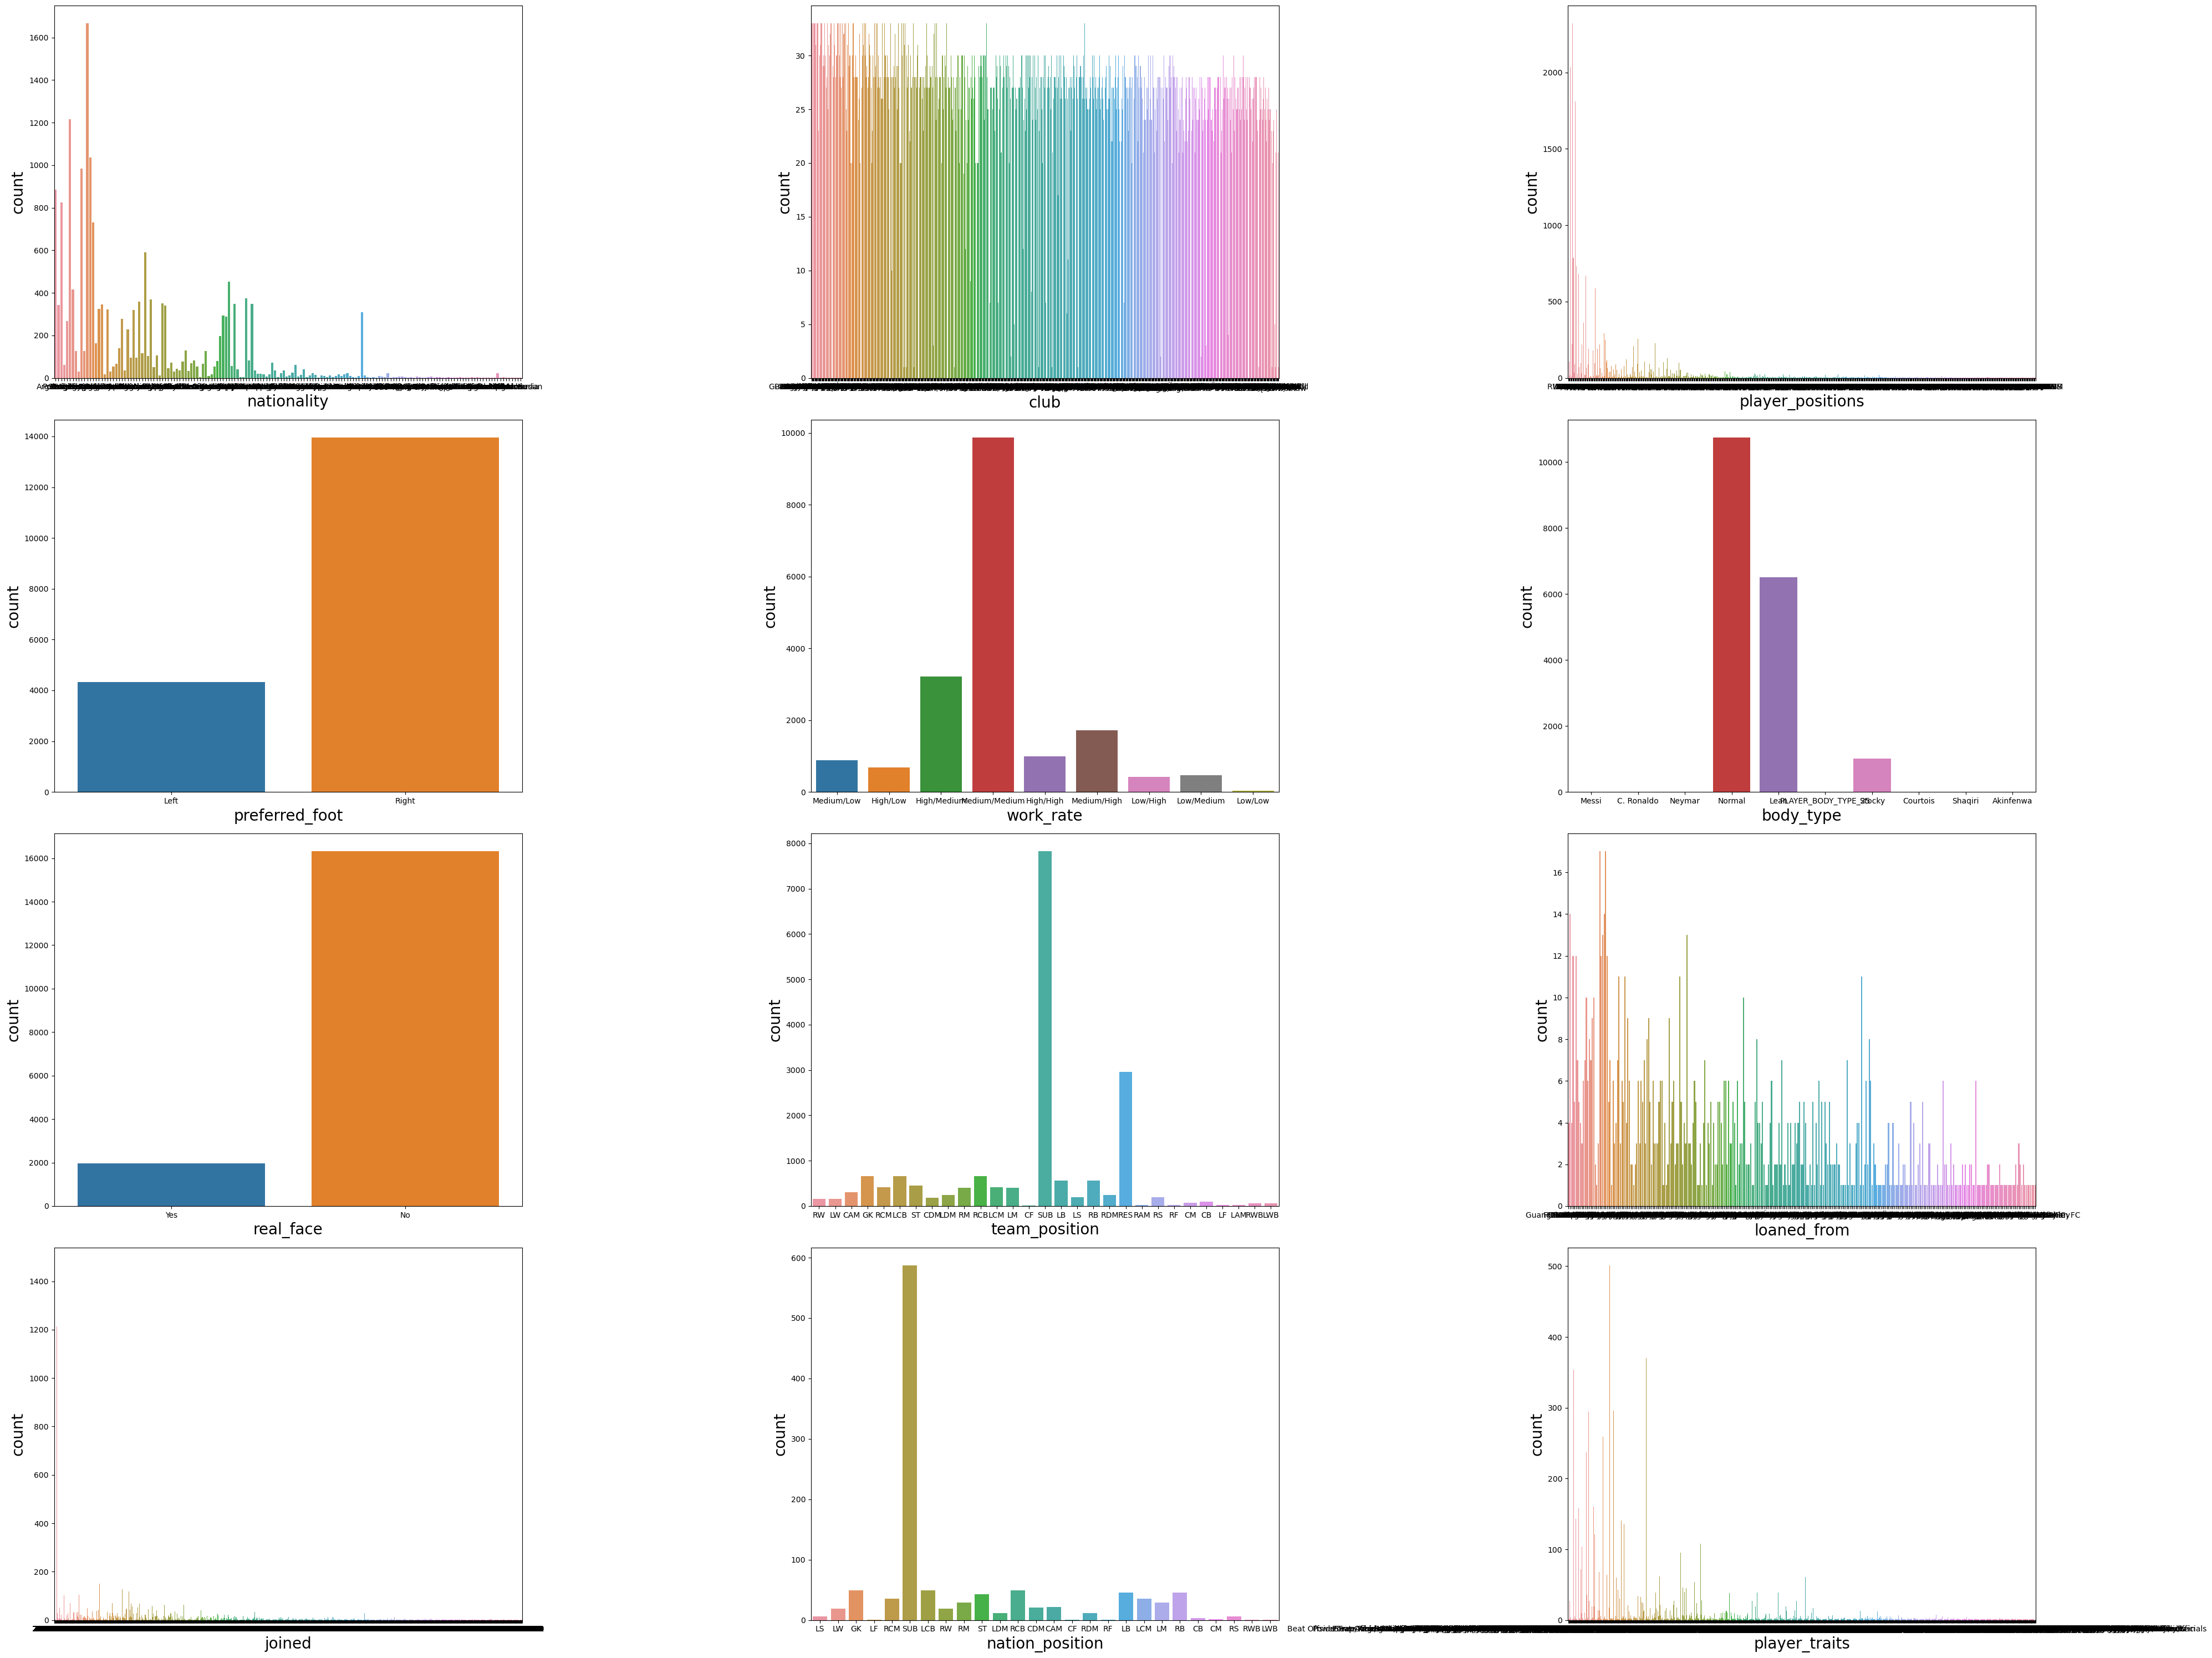

In [14]:
# Dristribution of categorical categorical data
plt.figure(figsize=(40,30),facecolor="white")
plotnumber=1
for column in cat_column:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.countplot(x=cat_column[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

*   Total 162 nationalities in that the majority of player from England which are 1667.
*   Majority of players playing with their right foot.
*   Large number of players work rate is medium-medium.
*   large number of players having normal body type.
*   Majority of the players doesn't have real face in fifa 20 game.
*   Large number of players having position as SUB.
*   Large players are having their position in nation_position as SUB.







<Axes: xlabel='age', ylabel='movement_reactions'>

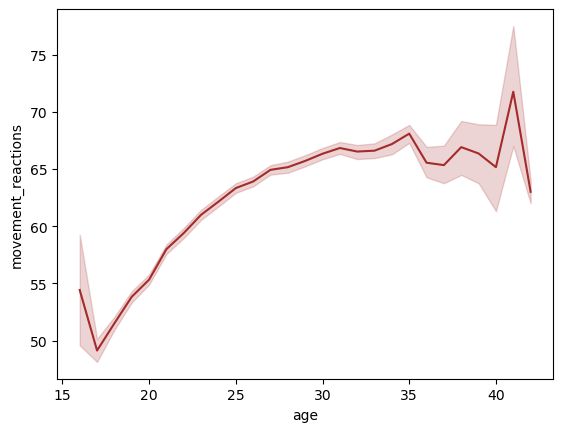

In [15]:
# Imapact of AGE on Moment Reaction
sns.lineplot(x='age',y='movement_reactions',data=data,color='brown')



*   According to above plot if players age is increasing then players movement reaction also increasing.
*   At the age of 15 to 20 players movement reaction is less.



<Axes: xlabel='height_cm', ylabel='weight_kg'>

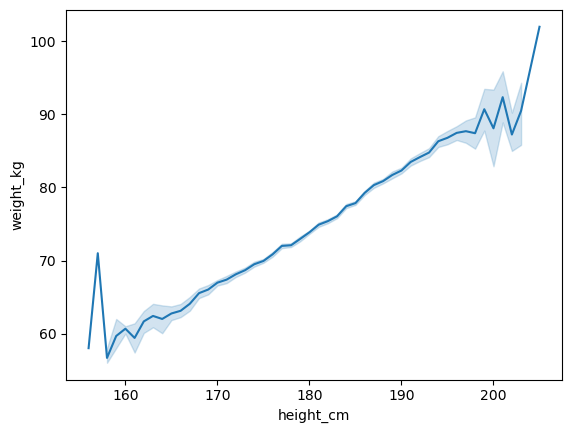

In [16]:
# Relation between height and weight
sns.lineplot(x='height_cm',y='weight_kg',data=data)



*   If players height increases then weight also increases.


<Axes: xlabel='overall', ylabel='wage_eur'>

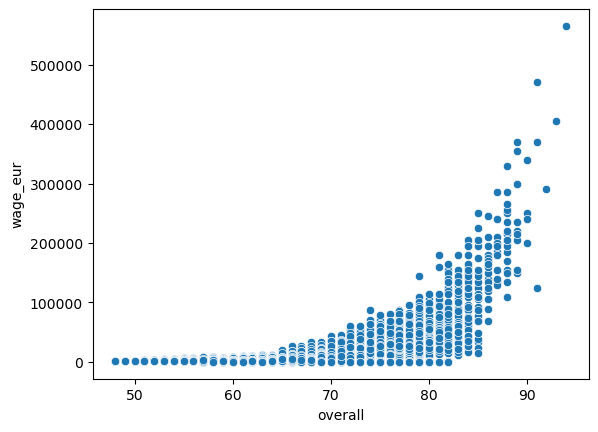

In [17]:
# Relation between overall and wage_eur
sns.scatterplot(x='overall',y='wage_eur',data=data)



*   Overall rating of player increases then wage_eur also increases.



<Axes: xlabel='value_eur', ylabel='wage_eur'>

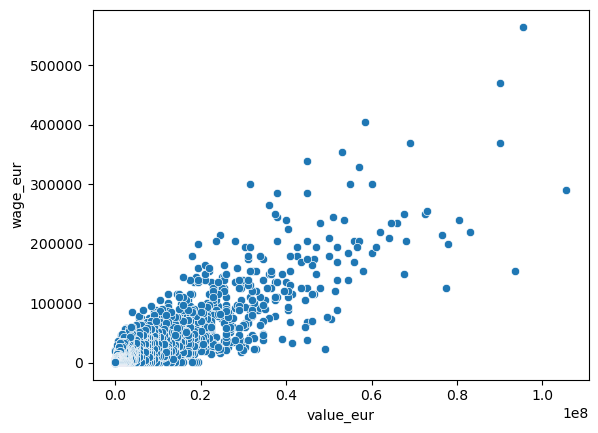

In [18]:
# Relation between wage_eur and value_eur
sns.scatterplot(x='value_eur',y='wage_eur',data=data)



*   Value of player is less then wage of player is less.
*   Value of player is more then wage of player slightly more.



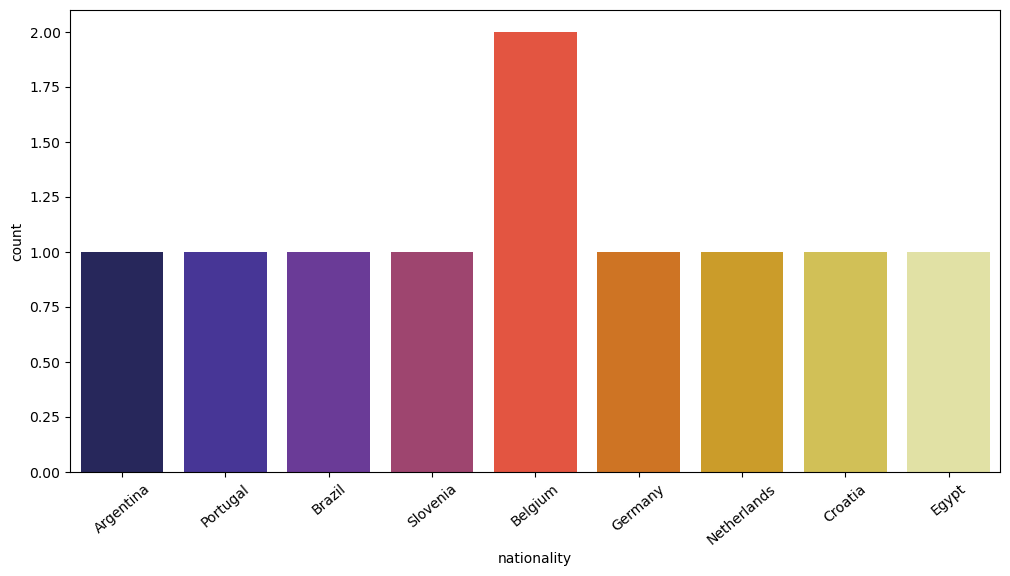

In [19]:
# Top 10 nationality player
plt.figure(figsize=(12,6))
sns.countplot(x='nationality',data=data.head(10),palette='CMRmap')
plt.xticks(rotation=40)
plt.show()



*   Most of the Belgium players in top 10.



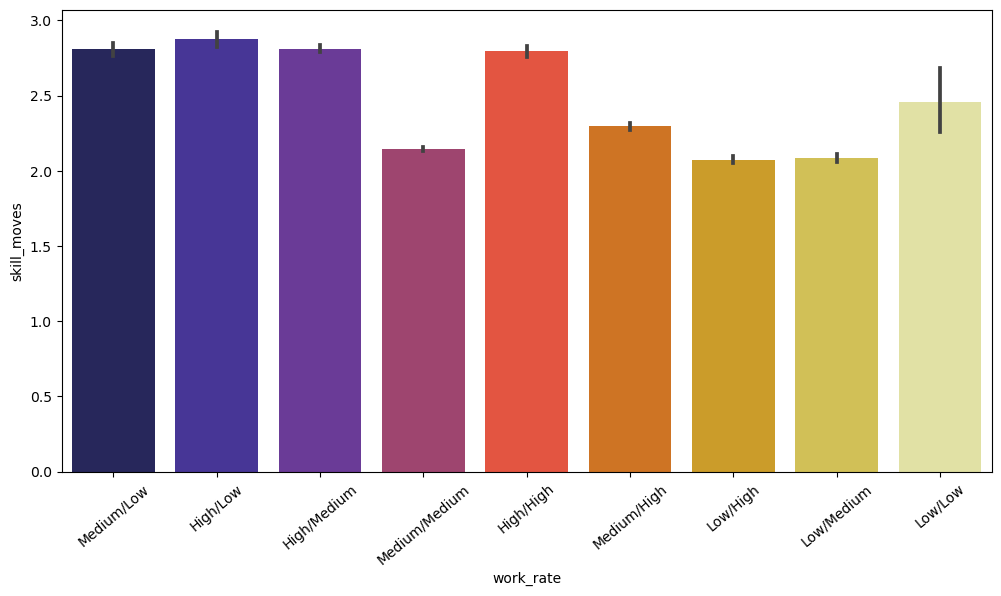

In [20]:
# Impact of work_rate on skill moves
plt.figure(figsize=(12,6))
sns.barplot(x='work_rate',y='skill_moves',data=data,palette='CMRmap')
plt.xticks(rotation=40)
plt.show()



*   In this plot cleary seen that 4 types of work rate has less than 2.5 skill moves which are medium/medium,mediun/high,low/high,low/medium.
*   Other work rate skill moves greater than 2.5.



<Axes: xlabel='international_reputation', ylabel='overall'>

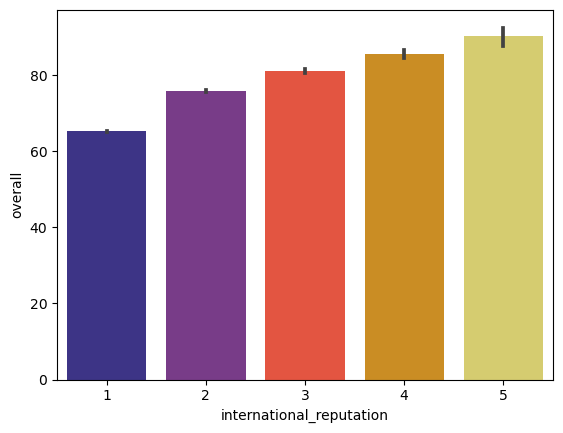

In [21]:
# Relation between international reputation
sns.barplot(x='international_reputation',y='overall',data=data,palette='CMRmap')

In [22]:
IR=data.groupby(['international_reputation']).overall.mean()
IR

international_reputation
1    65.273133
2    75.835965
3    81.157534
4    85.586957
5    90.166667
Name: overall, dtype: float64

*   The players having 5 international_reputation will have overall rating on an avg of 90.166
*   The players having 1 international_reputation will have overall rating on an avg of 65.27.

### Data Preprocessing:

In [23]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [24]:
# check missing value with percentage.
def missing_data(data):
    null_val = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_val = pd.concat([null_val,percentage],axis=1,keys=['Missing_Number','Missing_Percentage'])
    return null_val
missing_data(data)

Missing_Number  Missing_Percentage
sofifa_id                                0            0.000000
player_url                               0            0.000000
short_name                               0            0.000000
long_name                                0            0.000000
age                                      0            0.000000
dob                                      0            0.000000
height_cm                                0            0.000000
weight_kg                                0            0.000000
nationality                              0            0.000000
club                                     0            0.000000
overall                                  0            0.000000
potential                                0            0.000000
value_eur                                0            0.000000
wage_eur                                 0            0.000000
player_positions                         0            0.000000
preferred_foot                           0            0.000000
international_reputation                 0            0.000000
weak_foot                                0            0.000000
skill_moves                              0            0.000000
work_rate                                0            0.000000
body_type                                0            0.000000
real_face                                0            0.000000
release_clause_eur                    1298            7.101433
player_tags                          16779           91.798884
team_position                          240            1.313054
team_jersey_number                     240            1.313054
loaned_from                          17230           94.266331
joined                                1288            7.046723
contract_valid_until                   240            1.313054
nation_position                      17152           93.839589
nation_jersey_number                 17152           93.839589
pace                                  2036           11.139074
shooting                              2036           11.139074
passing                               2036           11.139074
dribbling                             2036           11.139074
defending                             2036           11.139074
physic                                2036           11.139074
gk_diving                            16242           88.860926
gk_handling                          16242           88.860926
gk_kicking                           16242           88.860926
gk_reflexes                          16242           88.860926
gk_speed                             16242           88.860926
gk_positioning                       16242           88.860926
player_traits                        10712           58.605974
attacking_crossing                       0            0.000000
attacking_finishing                      0            0.000000
attacking_heading_accuracy               0            0.000000
attacking_short_passing                  0            0.000000
attacking_volleys                        0            0.000000
skill_dribbling                          0            0.000000
skill_curve                              0            0.000000
skill_fk_accuracy                        0            0.000000
skill_long_passing                       0            0.000000
skill_ball_control                       0            0.000000
movement_acceleration                    0            0.000000
movement_sprint_speed                    0            0.000000
movement_agility                         0            0.000000
movement_reactions                       0            0.000000
movement_balance                         0            0.000000
power_shot_power                         0            0.000000
power_jumping                            0            0.000000
power_stamina                            0            0.000000
power_strength                           0            0.000



*   Feature has more than 50% missing value drop this feature.
*   team_jersy_number and contract_valid_until are unique features so drop those as well.



In [25]:
# Handling missing values

### For numerical columns:

In [26]:
numerical_columns=numerical_columns.drop(['sofifa_id','team_jersey_number','contract_valid_until','nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],axis=1)

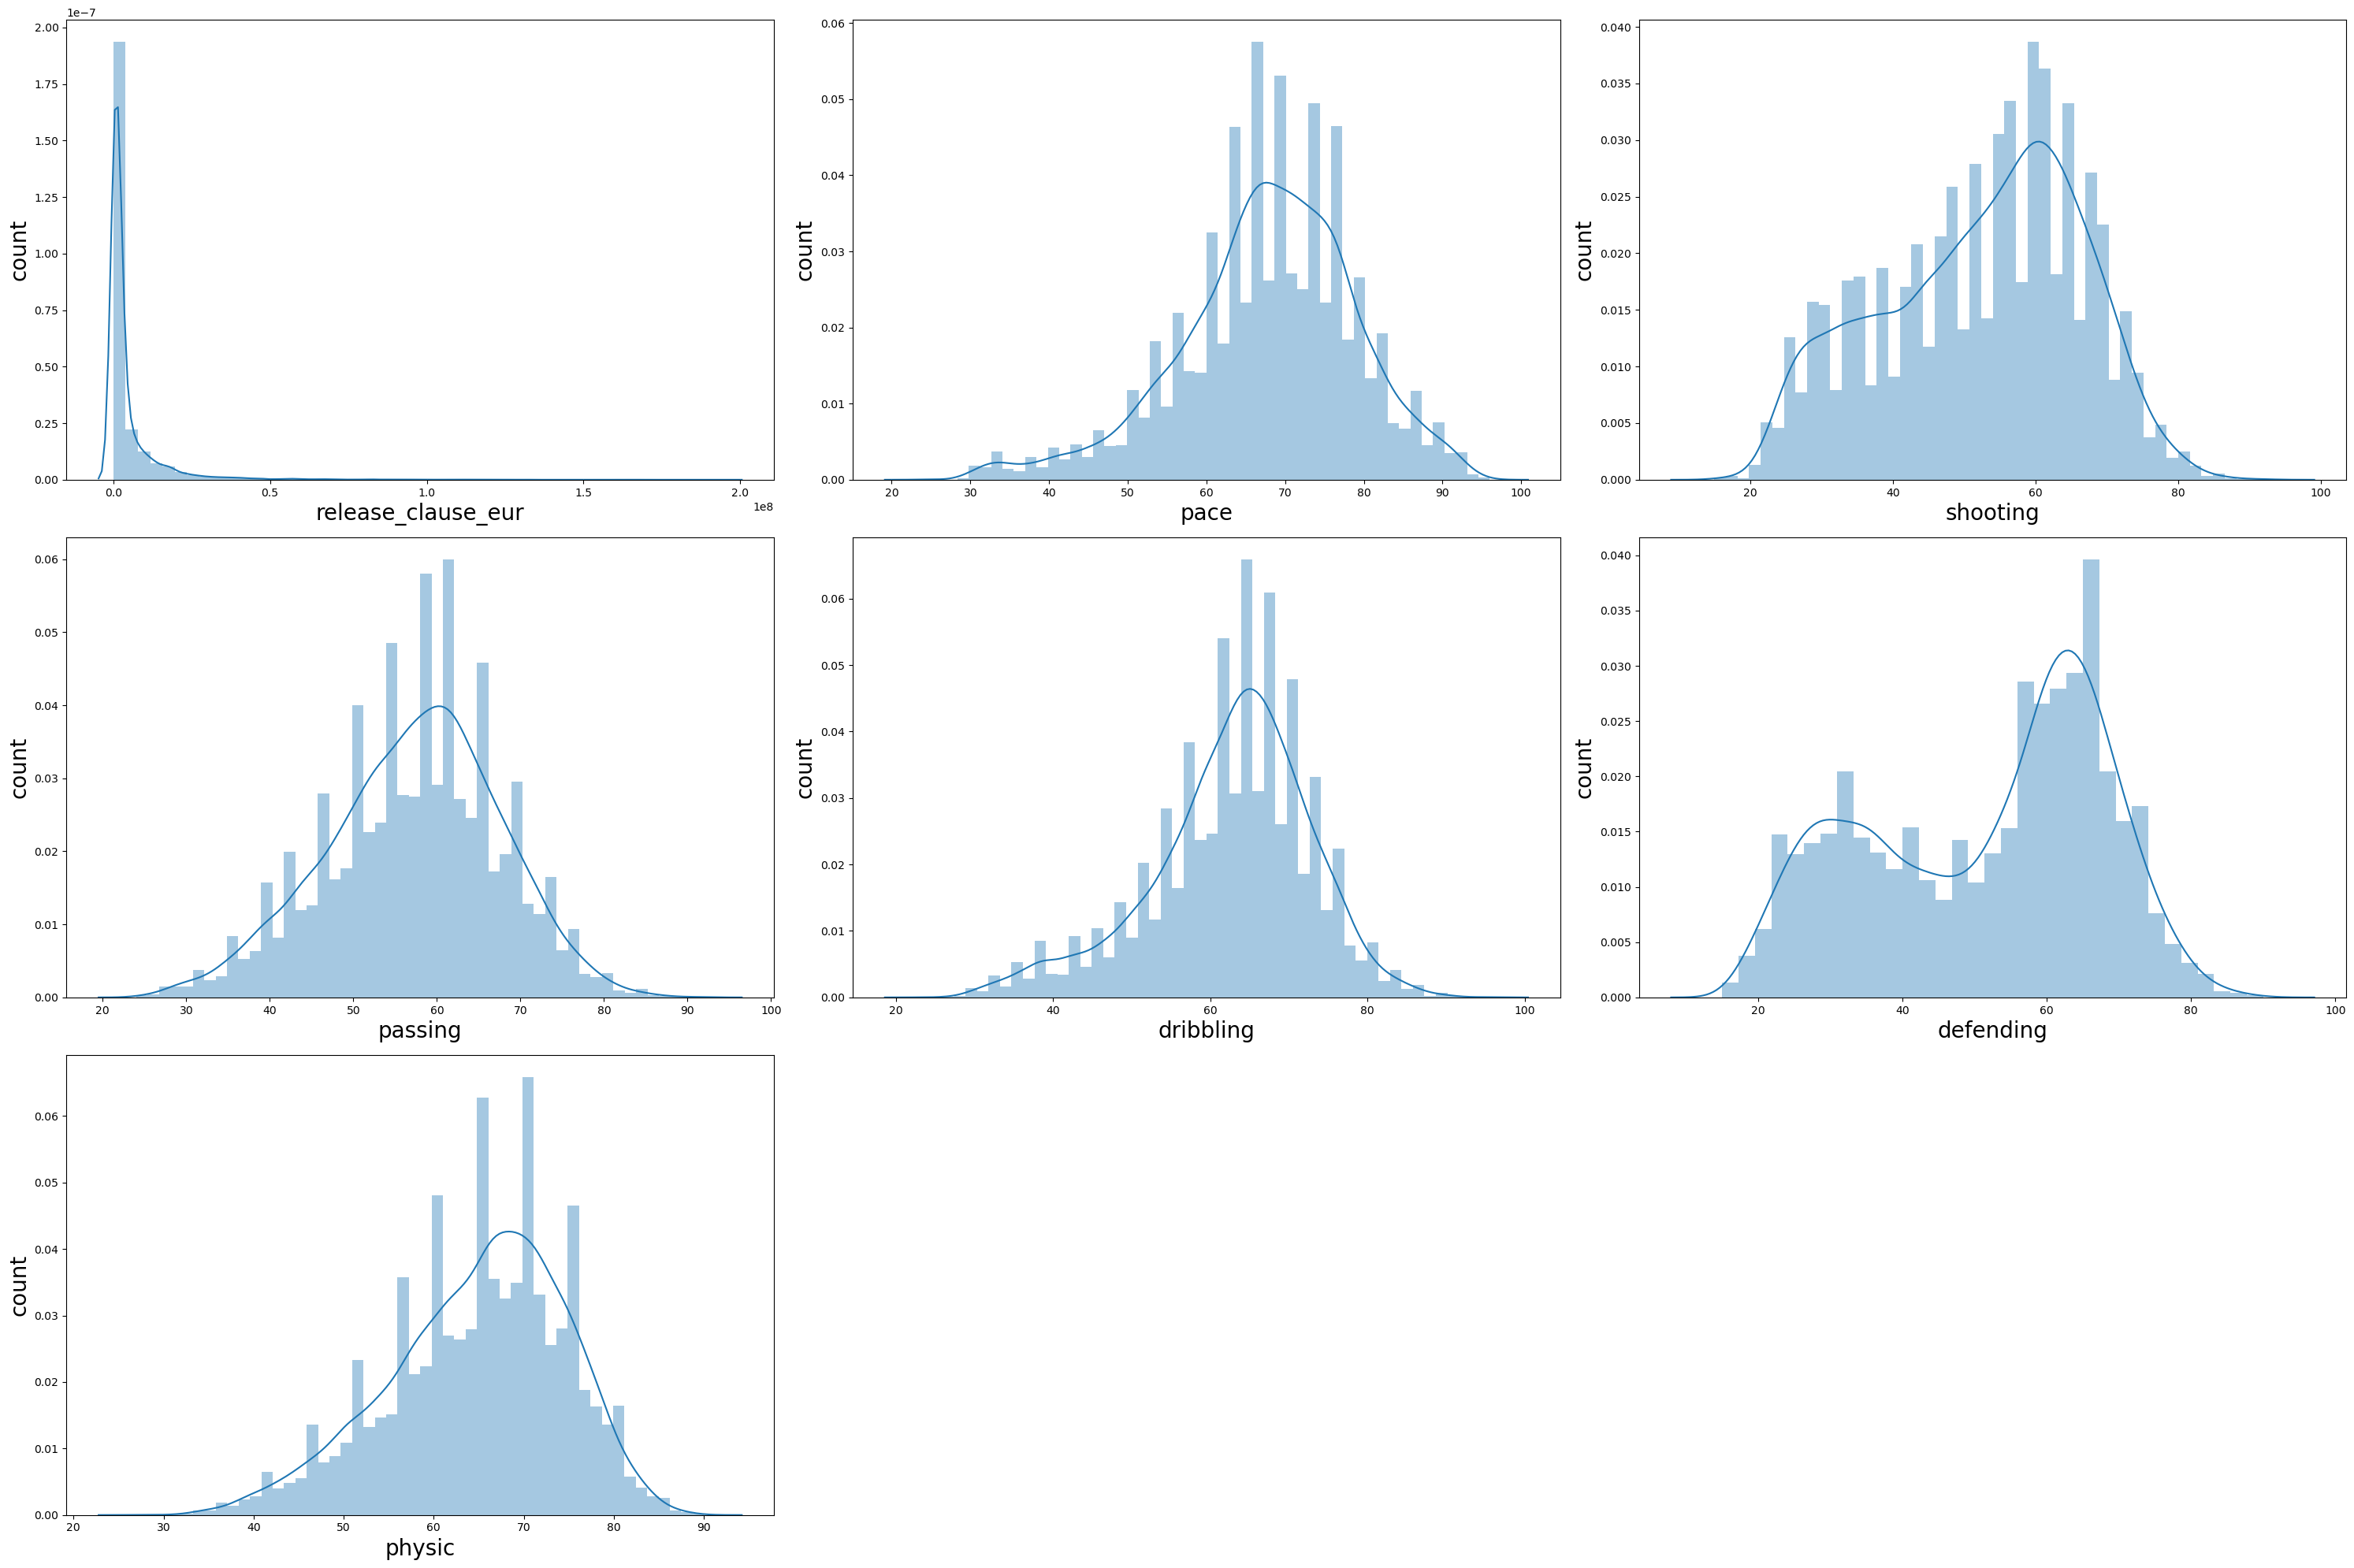

In [27]:
missing_data=numerical_columns[['release_clause_eur','pace','shooting','passing','dribbling','defending','physic']]
plt.figure(figsize=(30,20),facecolor="white")
plotnumber=1
for column in missing_data:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(x=missing_data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [28]:
# data is not normal distributed so imputing value using median

In [29]:
numerical_columns.loc[numerical_columns['release_clause_eur'].isnull()==True,'release_clause_eur']=numerical_columns.release_clause_eur.median()
numerical_columns.loc[numerical_columns['pace'].isnull()==True,'pace']=numerical_columns.pace.median()
numerical_columns.loc[numerical_columns['shooting'].isnull()==True,'shooting']=numerical_columns.shooting.median()
numerical_columns.loc[numerical_columns['passing'].isnull()==True,'passing']=numerical_columns.passing.median()
numerical_columns.loc[numerical_columns['dribbling'].isnull()==True,'dribbling']=numerical_columns.dribbling.median()
numerical_columns.loc[numerical_columns['defending'].isnull()==True,'defending']=numerical_columns.defending.median()
numerical_columns.loc[numerical_columns['physic'].isnull()==True,'physic']=numerical_columns.physic.median()

In [30]:
numerical_columns.isnull().sum()

age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement

In [31]:
# Removing highly correlated columns

In [32]:
cor_matrix = numerical_columns.corr().abs()
upper_triagle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_triagle.columns if any(upper_triagle[column] > 0.90)]
numerical_columns = numerical_columns.drop(to_drop, axis=1)  # Refrence from https://towardsdatascience.com/are-you-dropping-too-many-correlated-features-d1c96654abe6

In [33]:
numerical_columns.shape

(18278, 40)

#### Handling outliers of numerical data

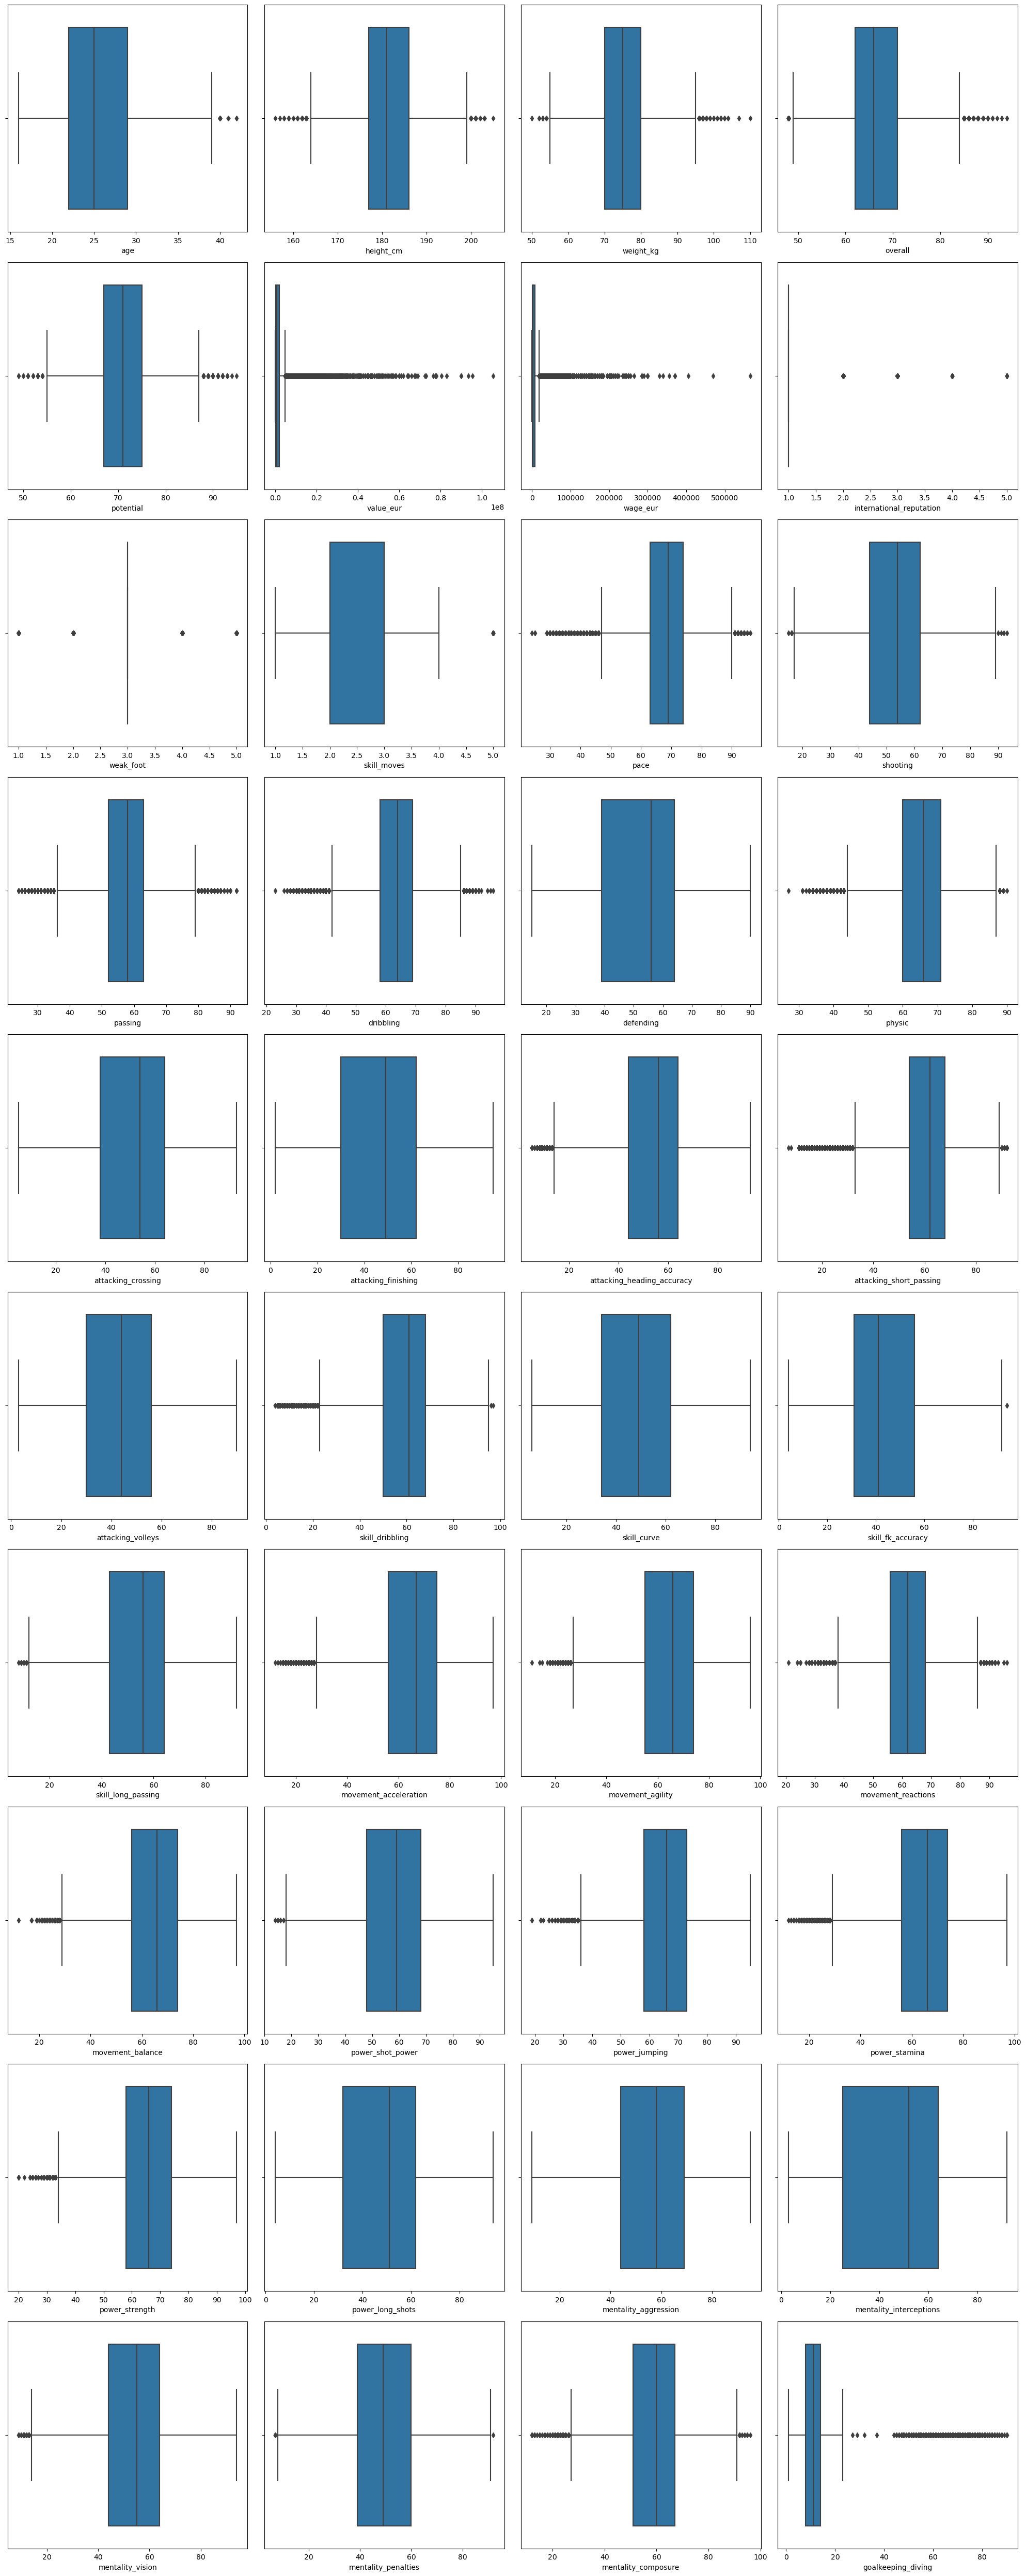

In [34]:
plt.figure(figsize=(20,50),facecolor="white")
plotnumber=1
for column in numerical_columns:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(x=numerical_columns[column])
        plt.xlabel(column,fontsize=10)
        #plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [35]:
# Check Distribution of data for what type of outlier handling method use.

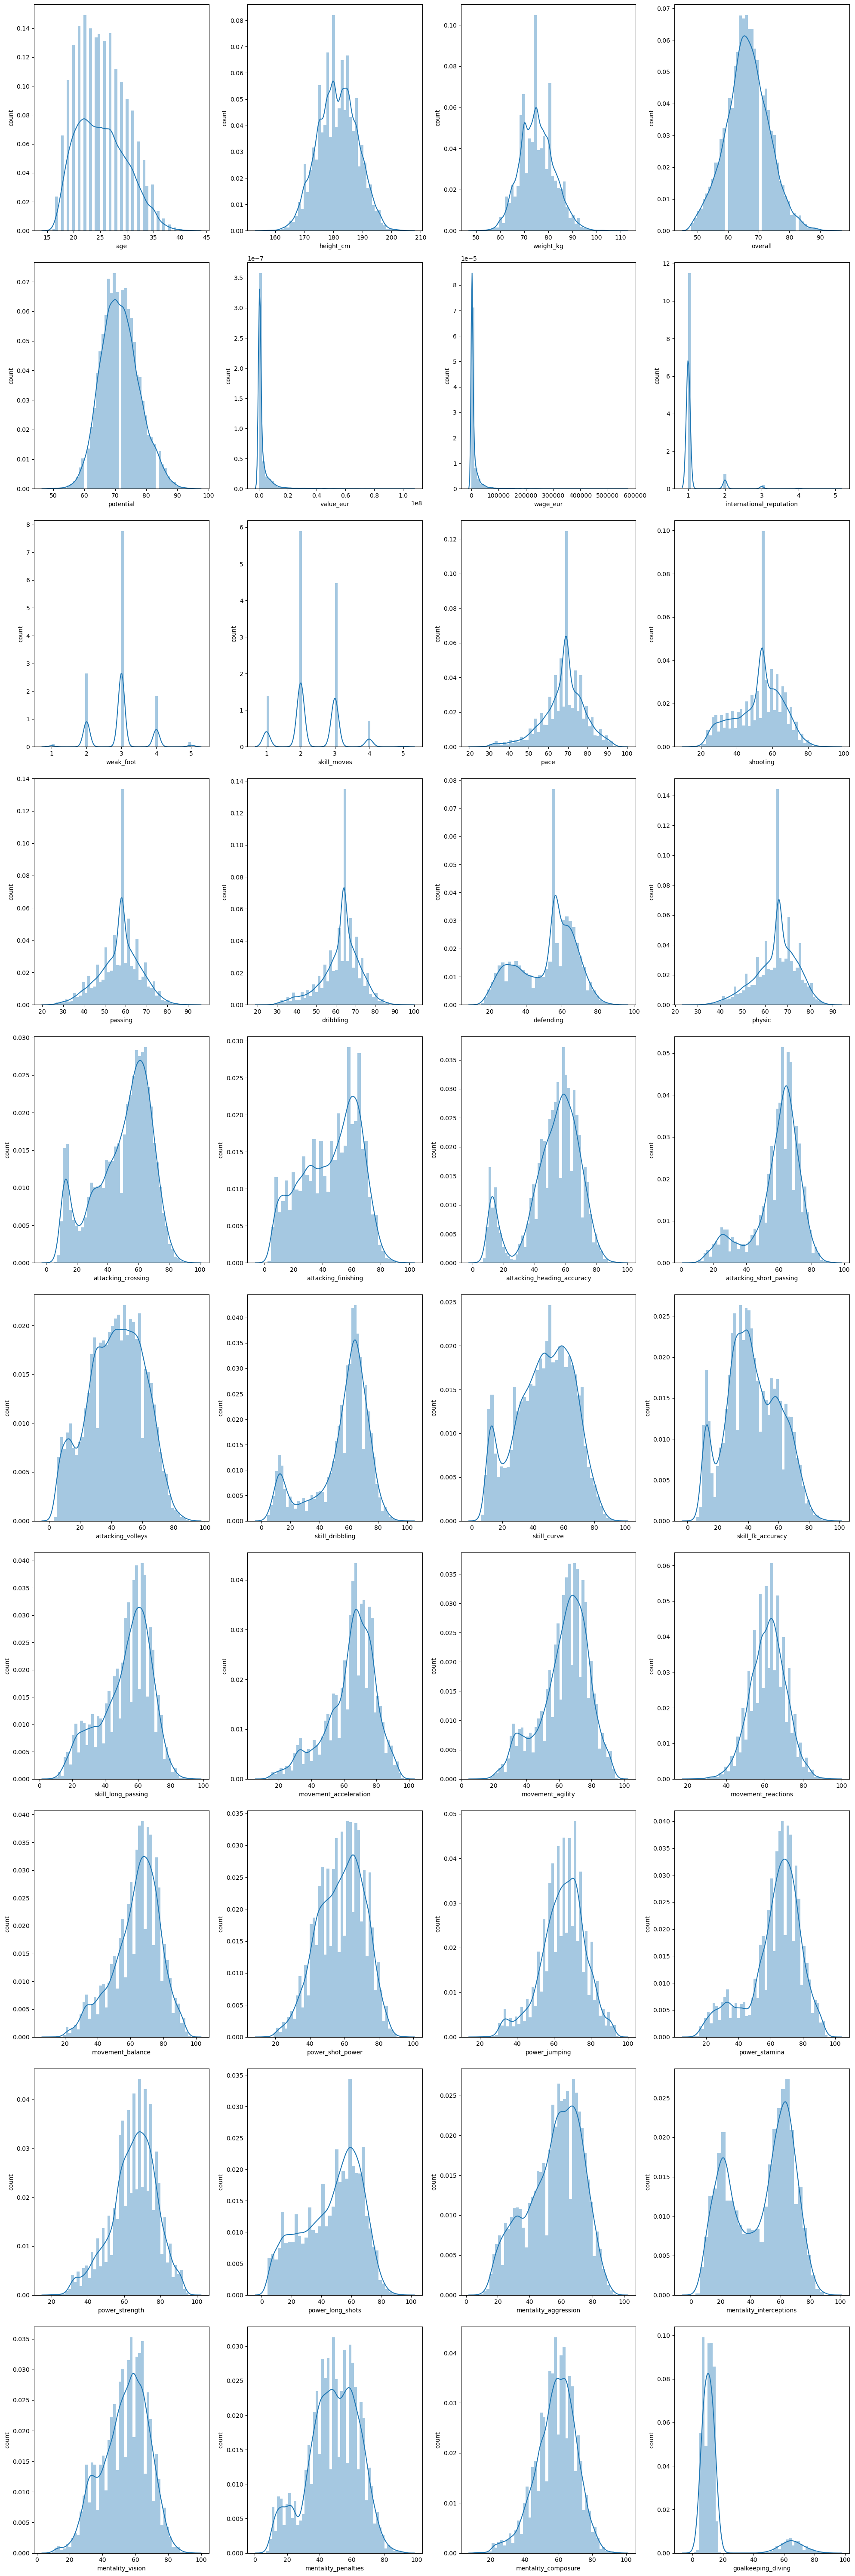

In [36]:
plt.figure(figsize=(20,60),facecolor="white")
plotnumber=1
for column in numerical_columns:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(x=numerical_columns[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [37]:
# Numerical data is not normally distributed so use IQR method for outlier handling

In [38]:
def handle_outliers(data1):
    for column in data1.columns:
        Q1 = data1[column].quantile(0.25)
        Q3 = data1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        data1[column] = np.where((data1[column] < lower_limit) | (data1[column] > upper_limit), data1[column].median(), data1[column])
    return data1

In [39]:
data1=handle_outliers(numerical_columns)

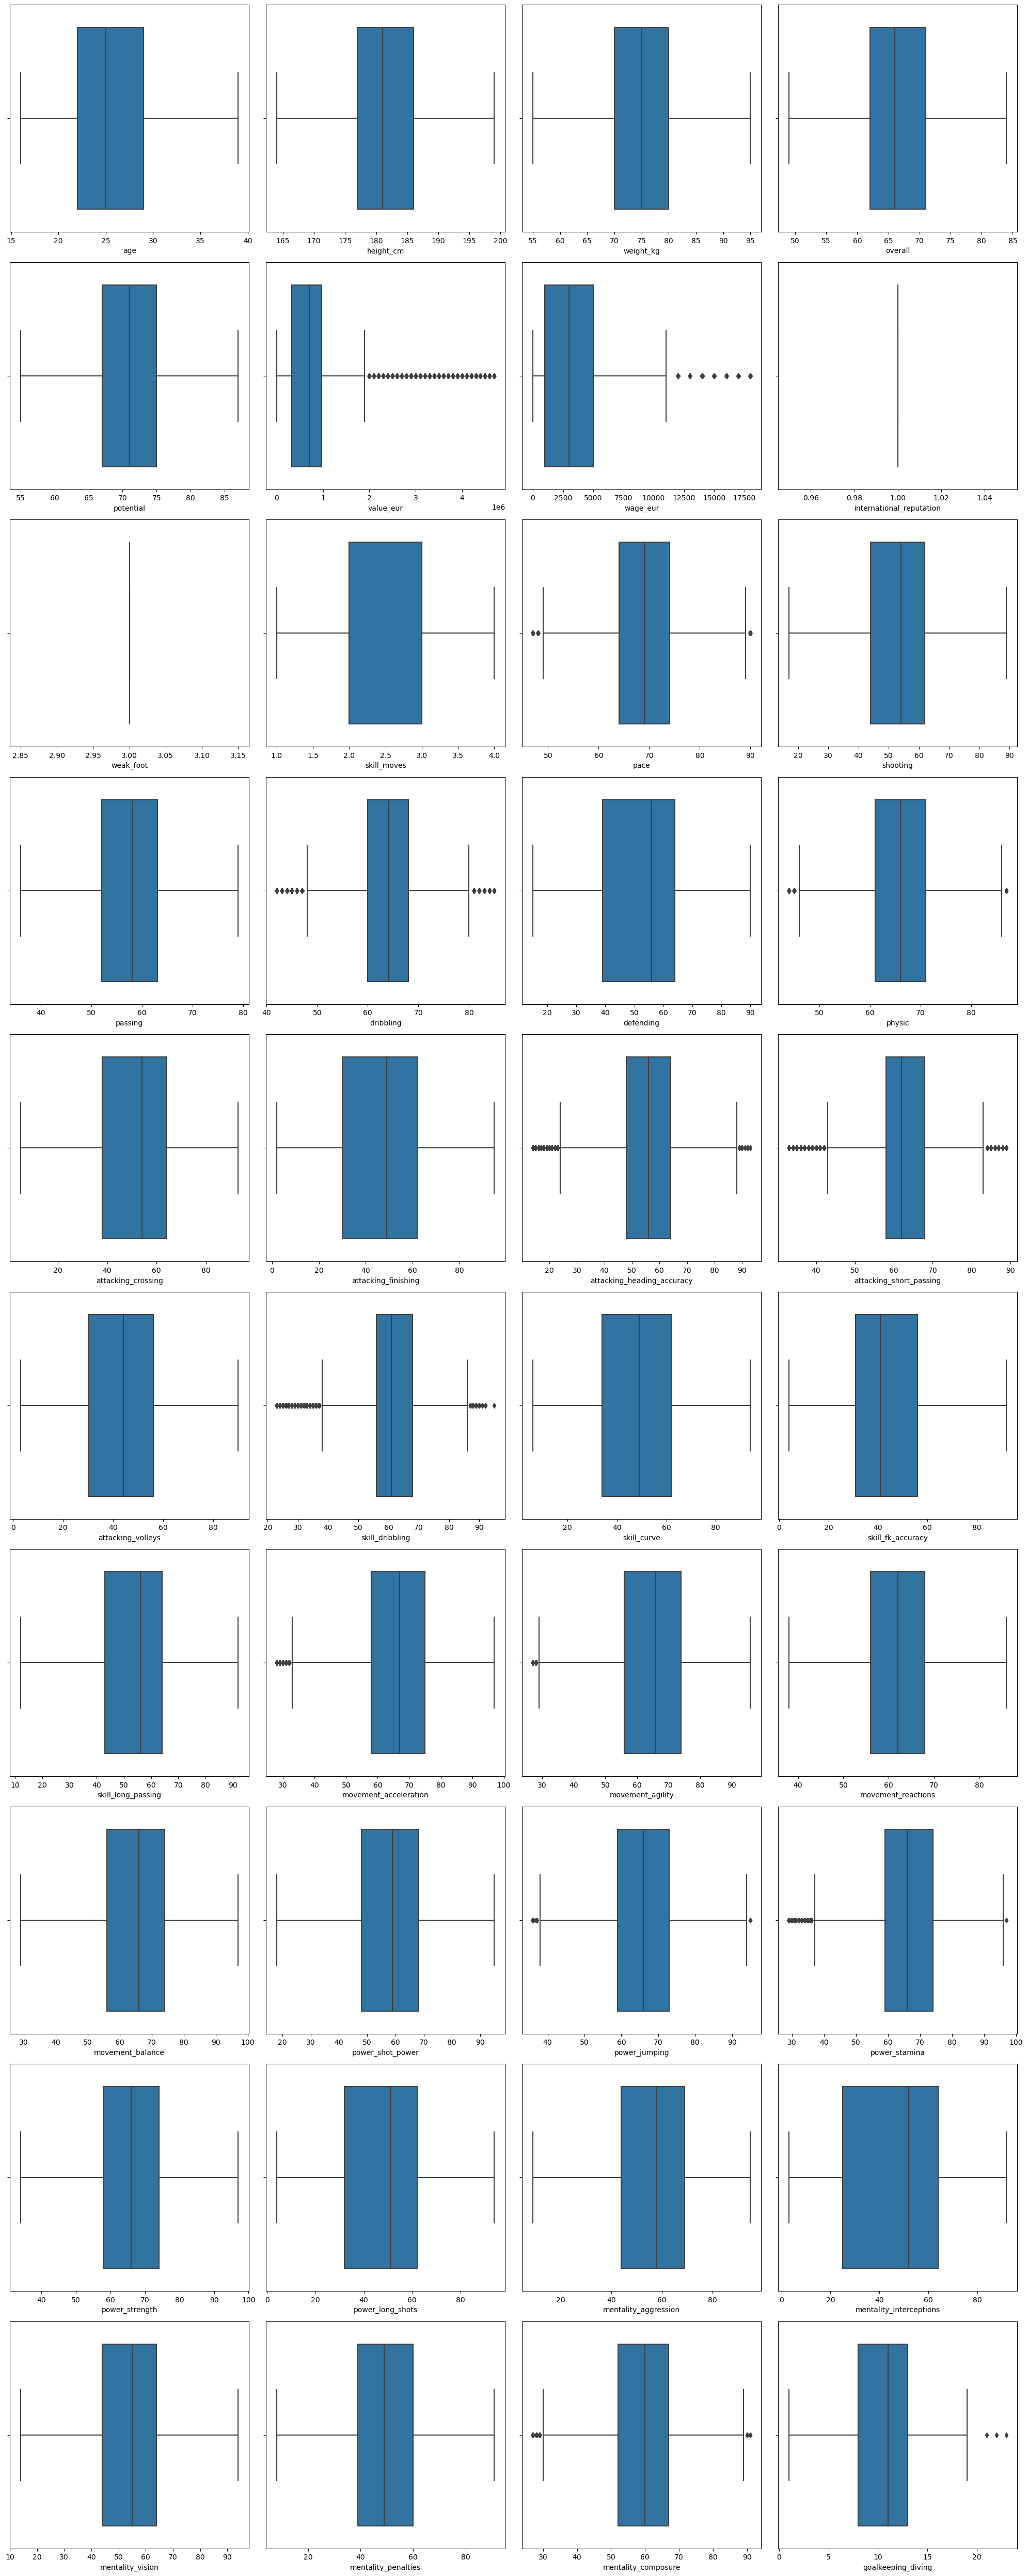

In [40]:
plt.figure(figsize=(20,50),facecolor="white")
plotnumber=1
for column in data1:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(x=data1[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [41]:
data1.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0  32.0      170.0       72.0     66.0       71.0   700000.0    3000.0   
1  34.0      187.0       83.0     66.0       71.0   700000.0    3000.0   
2  27.0      175.0       68.0     66.0       71.0   700000.0    3000.0   
3  26.0      188.0       87.0     66.0       71.0   700000.0    3000.0   
4  28.0      175.0       74.0     66.0       71.0   700000.0    3000.0   

   international_reputation  weak_foot  skill_moves  pace  shooting  passing  \
0                       1.0        3.0          4.0  87.0      54.0     58.0   
1                       1.0        3.0          2.0  90.0      54.0     58.0   
2                       1.0        3.0          2.0  69.0      85.0     58.0   
3                       1.0        3.0          1.0  69.0      54.0     58.0   
4                       1.0        3.0          4.0  69.0      83.0     58.0   

   dribbling  defending  physic  attacking_crossing  attacking_finishing  \
0       64.0       39.0    66.0                88.0                 95.0   
1       64.0       35.0    78.0                84.0                 94.0   
2       64.0       32.0    58.0                87.0                 87.0   
3       64.0       56.0    66.0                13.0                 11.0   
4       64.0       35.0    66.0                81.0                 84.0   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                        70.0                     62.0               88.0   
1                        89.0                     83.0               87.0   
2                        62.0                     87.0               87.0   
3                        15.0                     43.0               13.0   
4                        61.0                     89.0               83.0   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0             61.0         93.0               41.0                92.0   
1             89.0         81.0               76.0                77.0   
2             61.0         88.0               87.0                81.0   
3             61.0         13.0               14.0                40.0   
4             95.0         83.0               79.0                83.0   

   movement_acceleration  movement_agility  movement_reactions  \
0                   91.0              93.0                62.0   
1                   89.0              87.0                62.0   
2                   94.0              96.0                62.0   
3                   43.0              67.0                62.0   
4                   94.0              95.0                62.0   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0              95.0              86.0           68.0           75.0   
1              71.0              95.0           95.0           85.0   
2              84.0              80.0           61.0           81.0   
3              49.0              59.0           78.0           41.0   
4              94.0              82.0           56.0           84.0   

   power_strength  power_long_shots  mentality_aggression  \
0            68.0              94.0                  48.0   
1            78.0              93.0                  63.0   
2            49.0              84.0                  51.0   
3            78.0              12.0                  34.0   
4            63.0              80.0                  54.0   

   mentality_interceptions  mentality_vision  mentality_penalties  \
0                     40.0              94.0                 75.0   
1                     29.0              82.0                 85.0   
2                     36.0              90.0                 90.0   
3                     19.0              65.0                 11.0   
4                     41.0              89.0                 88.0   

   mentality_composure  goalkeeping_diving  
0                 60.0                 6.0  
1                

### Handling numerical columns which have object datatype:

In [42]:
categorical_columns.head()

player_url         short_name  \
0  https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1  https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2  https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
3  https://sofifa.com/player/200389/jan-oblak/20/...           J. Oblak   
4  https://sofifa.com/player/183277/eden-hazard/2...          E. Hazard   

                             long_name         dob nationality  \
0       Lionel Andrés Messi Cuccittini  1987-06-24   Argentina   
1  Cristiano Ronaldo dos Santos Aveiro  1985-02-05    Portugal   
2        Neymar da Silva Santos Junior  1992-02-05      Brazil   
3                            Jan Oblak  1993-01-07    Slovenia   
4                          Eden Hazard  1991-01-07     Belgium   

                  club player_positions preferred_foot      work_rate  \
0         FC Barcelona       RW, CF, ST           Left     Medium/Low   
1             Juventus           ST, LW          Right       High/Low   
2  Paris Saint-Germain          LW, CAM          Right    High/Medium   
3      Atlético Madrid               GK          Right  Medium/Medium   
4          Real Madrid           LW, CF          Right    High/Medium   

    body_type real_face                                        player_tags  \
0       Messi       Yes  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...   
1  C. Ronaldo       Yes  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
2      Neymar       Yes  #Speedster, #Dribbler, #Playmaker  , #Crosser,...   
3      Normal       Yes                                                NaN   
4      Normal       Yes                    #Speedster, #Dribbler, #Acrobat   

  team_position loaned_from      joined nation_position  \
0            RW         NaN  2004-07-01             NaN   
1            LW         NaN  2018-07-10              LS   
2           CAM         NaN  2017-08-03              LW   
3            GK         NaN  2014-07-16              GK   
4            LW         NaN  2019-07-01              LF   

                                       player_traits   ls   st   rs   lw   lf  \
0  Beat Offside Trap, Argues with Officials, Earl...   89   89   89   93   93   
1  Long Throw-in, Selfish, Argues with Officials,...   91   91   91   89   90   
2  Power Free-Kick, Injury Free, Selfish, Early C...   84   84   84   90   89   
3                         Flair, Acrobatic Clearance  NaN  NaN  NaN  NaN  NaN   
4  Beat Offside Trap, Selfish, Finesse Shot, Spee...   83   83   83   89   88   

    cf   rf   rw  lam  cam  ram   lm  lcm   cm  rcm   rm  lwb  ldm  cdm  rdm  \
0   93   93   93   93   93   93   92   87   87   87   92   68   66   66   66   
1   90   90   89   88   88   88   88   81   81   81   88   65   61   61   61   
2   89   89   90   90   90   90   89   82   82   82   89   66   61   61   61   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4   88   88   89   89   89   89   89   83   83   83   89   66   63   63   63   

   rwb   lb  lcb   cb  rcb   rb  
0   68   63   52   52   52   63  
1   65   61   53   53   53   61  
2   66   61   46   46   46   61  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4   66   61   49   49   49   61

In [43]:
num_categorical=categorical_columns[['ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']]
num_categorical.head()

ls   st   rs   lw   lf   cf   rf   rw  lam  cam  ram   lm  lcm   cm  rcm  \
0   89   89   89   93   93   93   93   93   93   93   93   92   87   87   87   
1   91   91   91   89   90   90   90   89   88   88   88   88   81   81   81   
2   84   84   84   90   89   89   89   90   90   90   90   89   82   82   82   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4   83   83   83   89   88   88   88   89   89   89   89   89   83   83   83   

    rm  lwb  ldm  cdm  rdm  rwb   lb  lcb   cb  rcb   rb  
0   92   68   66   66   66   68   63   52   52   52   63  
1   88   65   61   61   61   65   61   53   53   53   61  
2   89   66   61   61   61   66   61   46   46   46   61  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4   89   66   63   63   63   66   61   49   49   49   61

In [44]:
for column in num_categorical:
    num_categorical[column]=num_categorical[column].fillna(0) # Replace NAN with 0
    num_categorical[column]=num_categorical[column].astype(int) # change datatype into int

In [45]:
num_categorical.head()

ls  st  rs  lw  lf  cf  rf  rw  lam  cam  ram  lm  lcm  cm  rcm  rm  lwb  \
0  89  89  89  93  93  93  93  93   93   93   93  92   87  87   87  92   68   
1  91  91  91  89  90  90  90  89   88   88   88  88   81  81   81  88   65   
2  84  84  84  90  89  89  89  90   90   90   90  89   82  82   82  89   66   
3   0   0   0   0   0   0   0   0    0    0    0   0    0   0    0   0    0   
4  83  83  83  89  88  88  88  89   89   89   89  89   83  83   83  89   66   

   ldm  cdm  rdm  rwb  lb  lcb  cb  rcb  rb  
0   66   66   66   68  63   52  52   52  63  
1   61   61   61   65  61   53  53   53  61  
2   61   61   61   66  61   46  46   46  61  
3    0    0    0    0   0    0   0    0   0  
4   63   63   63   66  61   49  49   49  61

In [46]:
num_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ls      18278 non-null  int32
 1   st      18278 non-null  int32
 2   rs      18278 non-null  int32
 3   lw      18278 non-null  int32
 4   lf      18278 non-null  int32
 5   cf      18278 non-null  int32
 6   rf      18278 non-null  int32
 7   rw      18278 non-null  int32
 8   lam     18278 non-null  int32
 9   cam     18278 non-null  int32
 10  ram     18278 non-null  int32
 11  lm      18278 non-null  int32
 12  lcm     18278 non-null  int32
 13  cm      18278 non-null  int32
 14  rcm     18278 non-null  int32
 15  rm      18278 non-null  int32
 16  lwb     18278 non-null  int32
 17  ldm     18278 non-null  int32
 18  cdm     18278 non-null  int32
 19  rdm     18278 non-null  int32
 20  rwb     18278 non-null  int32
 21  lb      18278 non-null  int32
 22  lcb     18278 non-null  int32
 23  cb      182

In [47]:
# checking correlation of num_categorical data

<Axes: >

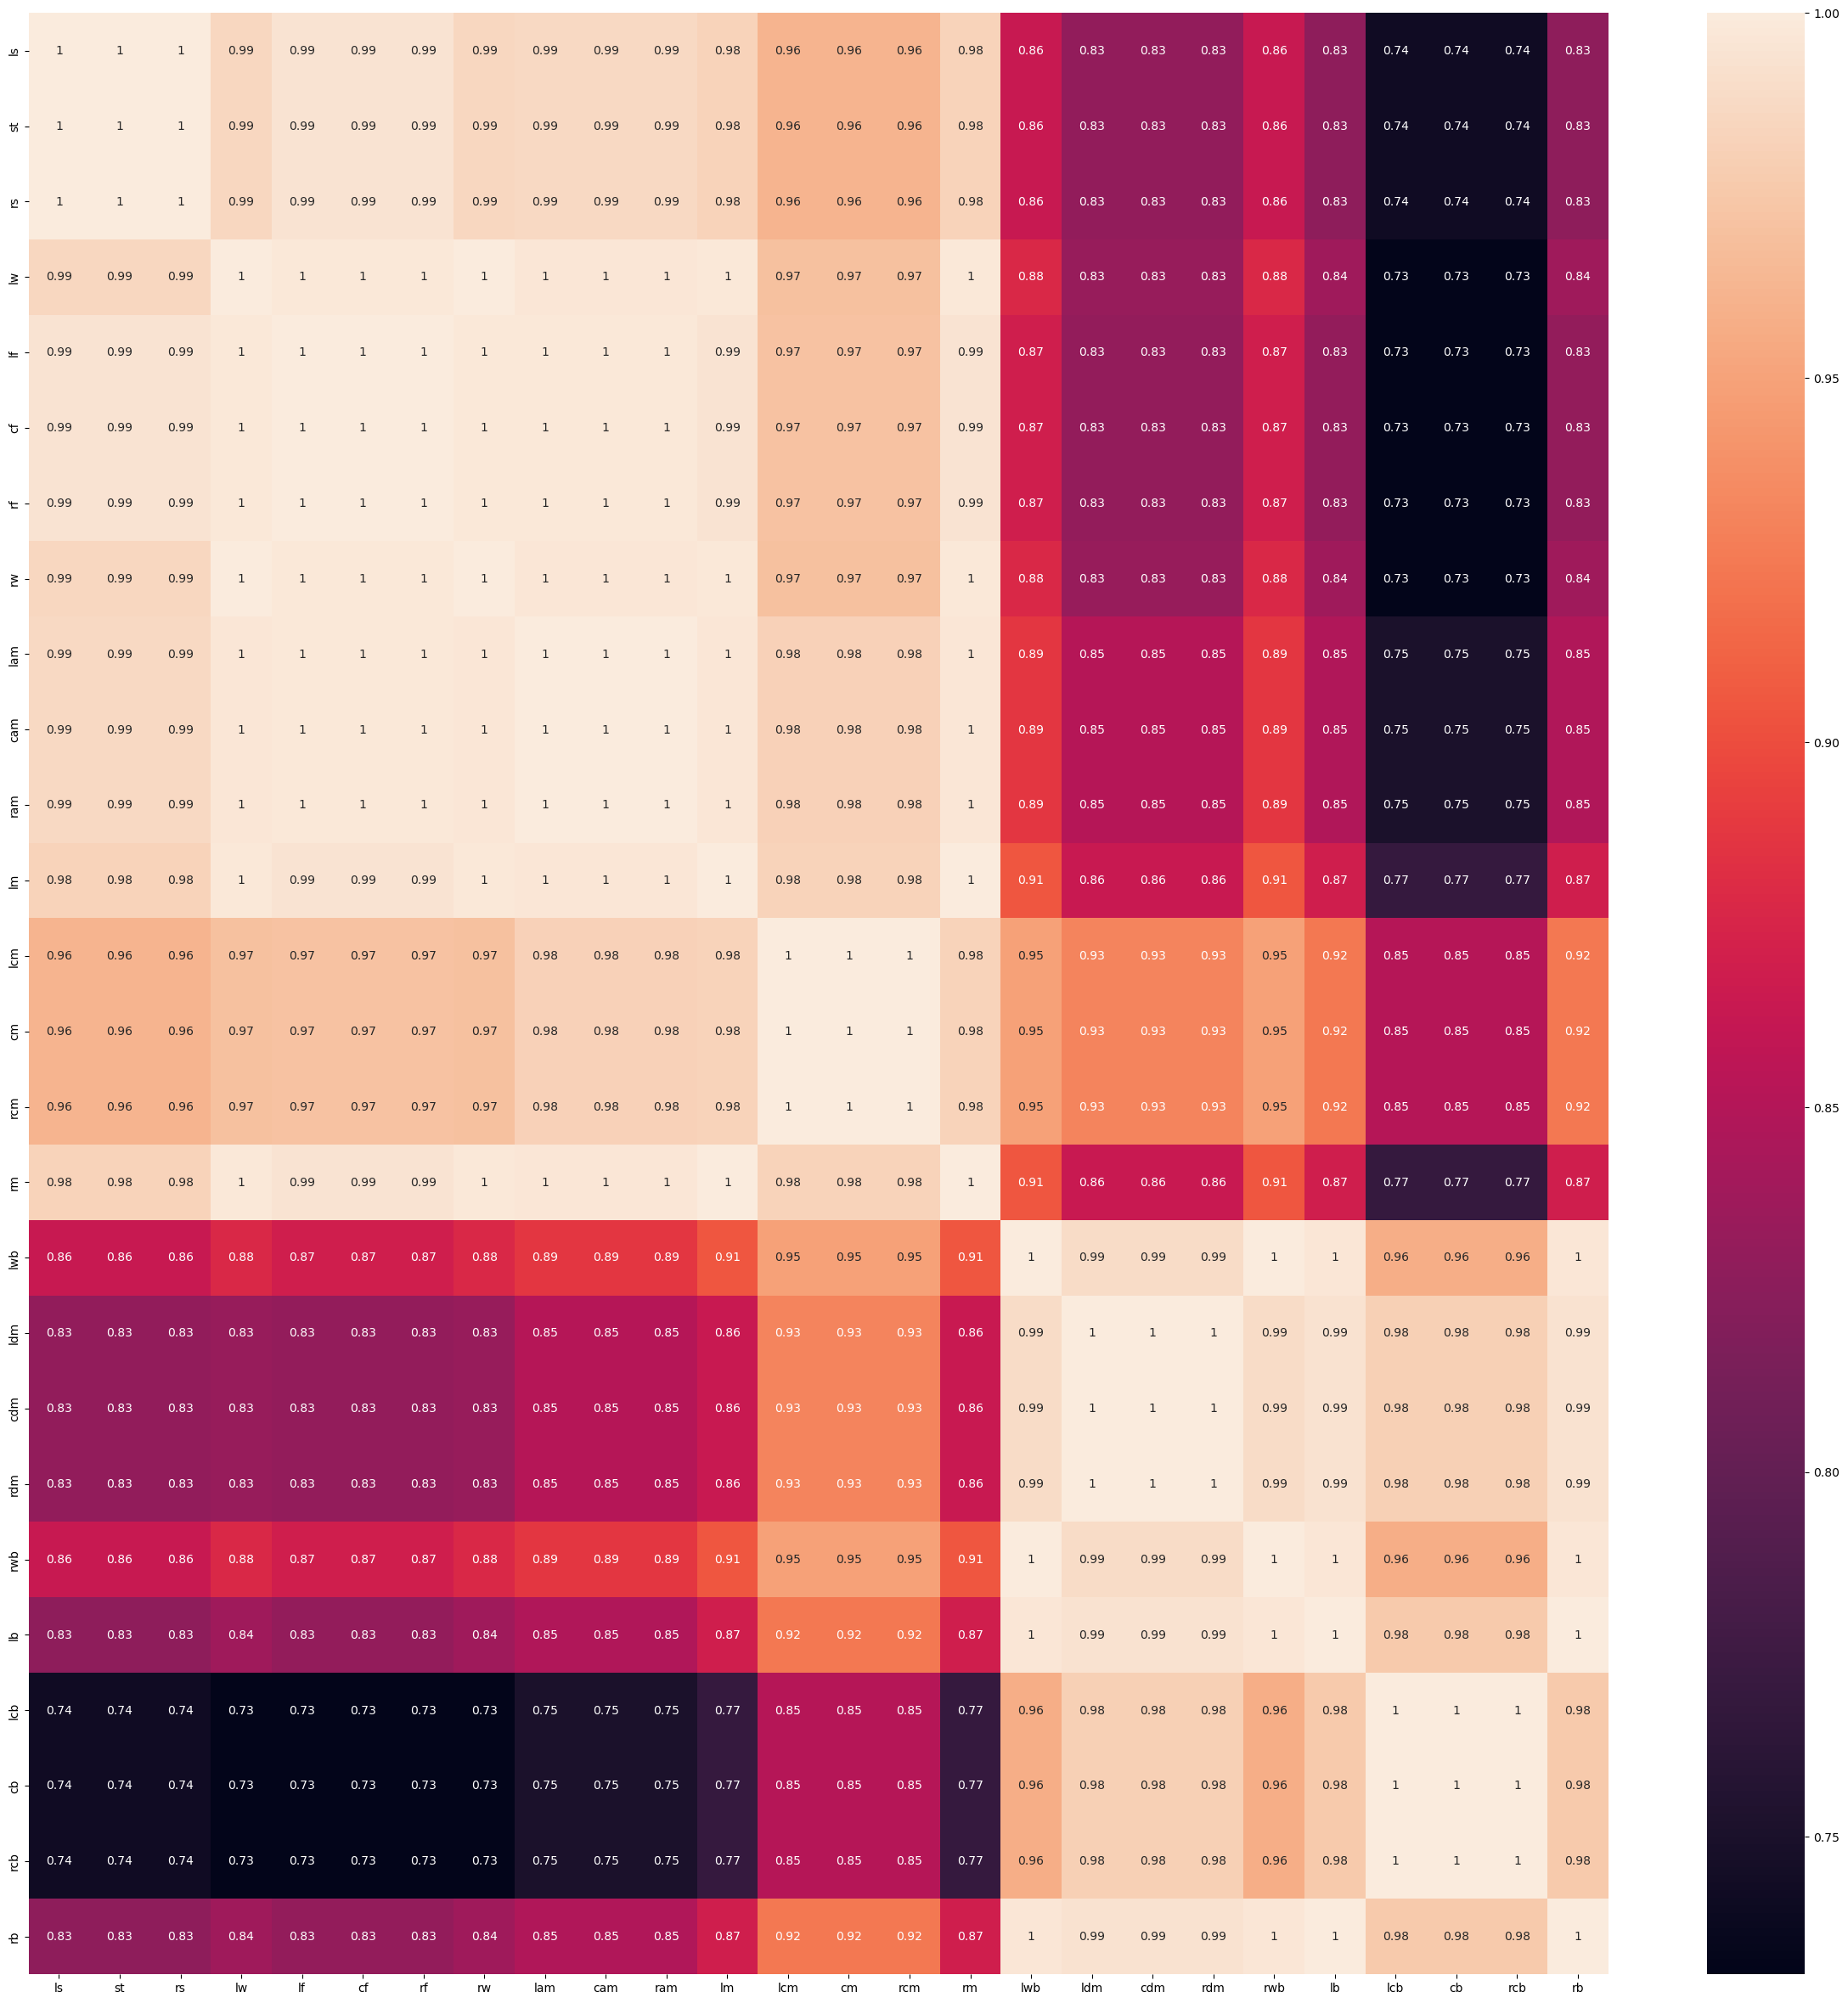

In [48]:
plt.figure(figsize=(30,30))
sns.heatmap(data=num_categorical.corr(),annot=True)

In [49]:
cor_matrix = num_categorical.corr().abs()
upper_triagle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_triagle.columns if any(upper_triagle[column] > 0.95)]
num_cat = num_categorical.drop(to_drop, axis=1)

In [50]:
num_cat.shape

(18278, 2)

In [51]:
num_cat.head()

ls  lwb
0  89   68
1  91   65
2  84   66
3   0    0
4  83   66

In [52]:
num_cat.shape

(18278, 2)

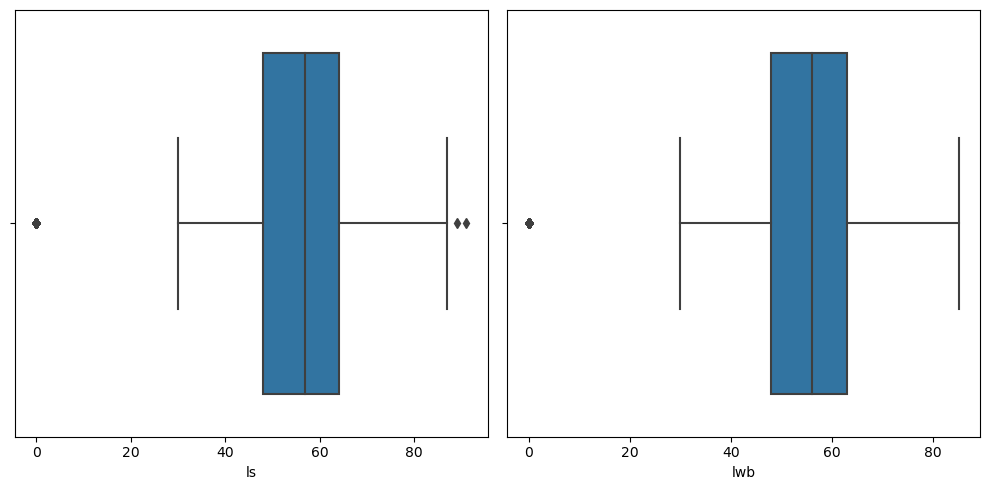

In [53]:
# Check for outliers
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1
for column in num_cat:
    if plotnumber<=2:
        ax=plt.subplot(1,2,plotnumber)
        sns.boxplot(x=num_cat[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

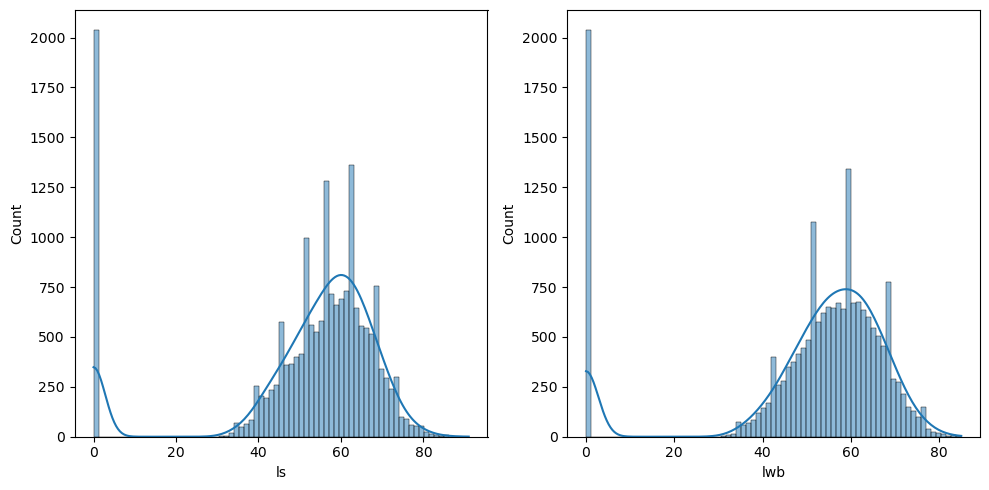

In [54]:
# Check distribution of data for handling outliers
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1
for column in num_cat:
    if plotnumber<=2:
        ax=plt.subplot(1,2,plotnumber)
        sns.histplot(x=num_cat[column],kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [55]:
num_cat=handle_outliers(num_cat)

In [56]:
num_cat.head()

ls   lwb
0  57.0  68.0
1  57.0  65.0
2  84.0  66.0
3  57.0  56.0
4  83.0  66.0

### Handling categorical data:

In [57]:
categorical_columns.columns

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [58]:
categorical_columns=categorical_columns.drop(['ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],axis=1)

In [59]:
categorical_columns.isnull().sum()

player_url              0
short_name              0
long_name               0
dob                     0
nationality             0
club                    0
player_positions        0
preferred_foot          0
work_rate               0
body_type               0
real_face               0
player_tags         16779
team_position         240
loaned_from         17230
joined               1288
nation_position     17152
player_traits       10712
dtype: int64

In [60]:
# player_tags,loaned_from,nation_position,player_traits has more than 90% missing values, so drop it.
# also drop player_url,short_name,long_name,dob are unique feature so drop it.

In [61]:
categorical_column=categorical_columns.drop(['player_tags','loaned_from','nation_position','player_traits','joined','player_url','short_name','long_name','dob'],axis=1)

In [62]:
# Handling missing values of team_position
categorical_column.team_position.value_counts()

SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: team_position, dtype: int64

In [63]:
categorical_column['team_position'] = categorical_column['team_position'].replace(np.nan,'SUB')

In [64]:
categorical_column.head()

nationality                 club player_positions preferred_foot  \
0   Argentina         FC Barcelona       RW, CF, ST           Left   
1    Portugal             Juventus           ST, LW          Right   
2      Brazil  Paris Saint-Germain          LW, CAM          Right   
3    Slovenia      Atlético Madrid               GK          Right   
4     Belgium          Real Madrid           LW, CF          Right   

       work_rate   body_type real_face team_position  
0     Medium/Low       Messi       Yes            RW  
1       High/Low  C. Ronaldo       Yes            LW  
2    High/Medium      Neymar       Yes           CAM  
3  Medium/Medium      Normal       Yes            GK  
4    High/Medium      Normal       Yes            LW

In [65]:
categorical_column.isnull().sum()

nationality         0
club                0
player_positions    0
preferred_foot      0
work_rate           0
body_type           0
real_face           0
team_position       0
dtype: int64

### Encoding categorical data

In [66]:
# apply one hot encoding 
cat_column=pd.get_dummies(categorical_column,drop_first=True)

In [67]:
cat_column.head()

nationality_Albania  nationality_Algeria  nationality_Angola  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   
3                    0                    0                   0   
4                    0                    0                   0   

   nationality_Antigua & Barbuda  nationality_Argentina  nationality_Armenia  \
0                              0                      1                    0   
1                              0                      0                    0   
2                              0                      0                    0   
3                              0                      0                    0   
4                              0                      0                    0   

   nationality_Australia  nationality_Austria  nationality_Azerbaijan  \
0                      0                    0                       0   
1                      0                    0                       0   
2                      0                    0                       0   
3                      0                    0                       0   
4                      0                    0                       0   

   nationality_Bahrain  nationality_Barbados  nationality_Belgium  \
0                    0                     0                    0   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    0   
4                    0                     0                    1   

   nationality_Belize  nationality_Benin  nationality_Bermuda  \
0                   0                  0                    0   
1                   0                  0                    0   
2                   0                  0                    0   
3                   0                  0                    0   
4                   0                  0                    0   

   nationality_Bolivia  nationality_Bosnia Herzegovina  nationality_Brazil  \
0                    0                               0                   0   
1                    0                               0                   0   
2                    0                               0                   1   
3                    0                               0                   0   
4                    0                               0                   0   

   nationality_Bulgaria  nationality_Burkina Faso  nationality_Burundi  \
0                     0                         0                    0   
1                     0                         0                    0   
2                     0                         0                    0   
3                     0                         0                    0   
4                     0                         0                    0   

   nationality_Cameroon  nationality_Canada  nationality_Cape Verde  \
0                     0                   0                       0   
1                     0                   0                       0   
2                     0                   0                       0   
3                     0                   0                       0   
4                     0                   0                       0   

   nationality_Central African Rep.  nationality_Chad  nationality_Chile  \
0                                 0                 0                  0   
1                                 0                 0                  0   
2                                 0                 0                  0   
3                                 0                 0                  0   
4                                 0                 0                  0   

   nationality_China PR  nationality_Chinese Taipei  nationality_Colombia  \

In [68]:
# Concaneate the splitted data

In [69]:
data2=pd.concat([data1,num_cat,cat_column],axis=1)

In [70]:
data2.shape

(18278, 1589)

### Scaling:

In [71]:
scaler= MinMaxScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(data2),columns= data2.columns)
     

### Principle Component analysis

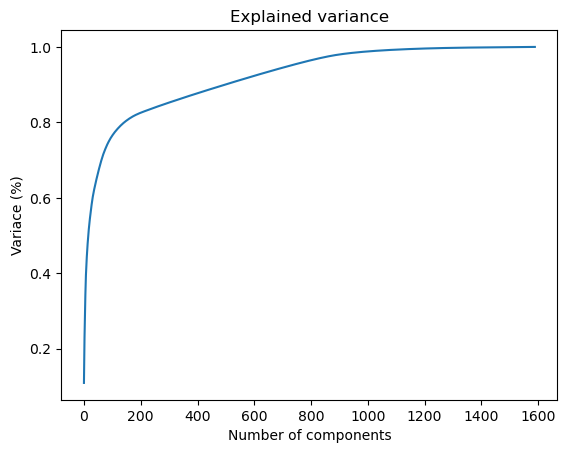

In [72]:
pca=PCA()
principalcomponents=pca.fit_transform(scaled_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Variace (%)")
plt.title("Explained variance")
plt.show()

In [73]:
# Finding the number of components that add up to 95% of the explained variance ratio
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(n_components)

726


In [74]:
pca=PCA(n_components=726)
new_data=pca.fit_transform(scaled_data)
principal_df=pd.DataFrame(data=new_data,columns=["PC{}".format(i+1) for i in range(n_components)])

In [75]:
principal_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.673774  0.021364 -0.091930 -0.389038 -0.058771  0.370609  0.085409   
1  1.475555 -0.175078  0.118193 -0.240596 -0.157728 -0.613441 -0.199605   
2  1.725556  0.046383 -0.230374 -0.390419  0.236245 -0.400912  0.121796   
3 -1.350592 -0.487365 -0.189901 -0.520055 -0.403280 -0.831018  0.902641   
4  1.859840 -0.671016 -0.405070 -0.472755  0.201201 -0.324117  0.097279   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.548449  0.436530  0.106030  0.334784 -0.507871  0.627008  0.300565   
1  0.317053  0.168421  0.098507  0.336345 -0.135161  0.360041  0.447362   
2 -0.162198 -0.364797  0.257740  0.175412  0.001474  0.292402  0.071077   
3  0.022489  0.020343  0.310047  0.373640 -0.292440  0.022141  0.345808   
4 -0.282031 -0.368866  0.429240  0.174179 -0.156013  0.018351  0.153634   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.419250 -0.159276  0.515410  0.250660 -0.285241  0.594855 -0.361875   
1 -0.344525 -0.153995  0.315687  0.358038 -0.285870 -0.185104  0.428742   
2 -0.649065 -0.155675 -0.194825  0.020366 -0.423592 -0.457593 -0.512469   
3 -0.319913 -0.266198 -0.045785  0.144434 -0.209026  0.045293 -0.074896   
4 -0.589261 -0.105107 -0.241445  0.149957 -0.289516 -0.040433 -0.018297   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.213201 -0.616423 -0.079489  0.086245 -0.103208 -0.048399 -0.173193   
1 -0.246524  0.516863 -0.010673  0.366148 -0.280385  0.000849 -0.106069   
2  0.452868  0.102108 -0.001364  0.240015 -0.075132  0.184978  0.114441   
3  0.123453 -0.042900 -0.041835 -0.106112  0.044908 -0.162840  0.116034   
4 -0.065639 -0.089360 -0.135906  0.123826  0.003646  0.014412 -0.073372   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0 -0.228248  0.028667 -0.374541  0.265622 -0.055329 -0.197795  0.119574   
1  0.298611 -0.214952 -0.241646  0.030989  0.179951 -0.201812  0.254361   
2 -0.259323 -0.073946 -0.199329  0.201427 -0.119218  0.010956 -0.113608   
3  0.160691  0.030855 -0.064284  0.030474  0.360344 -0.458874  0.227448   
4  0.090550 -0.113215 -0.069733 -0.023748  0.003209  0.040342 -0.130850   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0 -0.095887  0.044756  0.004669 -0.082985 -0.006032 -0.010362  0.066983   
1 -0.330085  0.287539  0.066350 -0.102566 -0.182991 -0.075615 -0.132934   
2 -0.129422  0.100086  0.081967 -0.030990 -0.000271  0.051012  0.200033   
3  0.037450 -0.104873  0.055295 -0.043126  0.038613 -0.048949 -0.026931   
4 -0.044003  0.052522  0.040824 -0.005147 -0.036152 -0.057095 -0.078367   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -0.029450 -0.082789 -0.043815  0.059402 -0.155345 -0.122867 -0.125702   
1  0.241310 -0.214789 -0.167396  0.196707  0.224346 -0.245752 -0.350648   
2  0.159048 -0.276996 -0.091967  0.177195 -0.149910 -0.169519 -0.253259   
3 -0.018447 -0.090306  0.035122  0.001610 -0.123543 -0.004372 -0.008217   
4  0.051221 -0.091040 -0.015565  0.185562 -0.145590 -0.015666 -0.068045   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0  0.018242  0.134555 -0.051403  0.071727  0.092671  0.001387 -0.019696   
1 -0.140992  0.054140  0.080028  0.231505  0.397873 -0.376579 -0.387704   
2 -0.005781  0.196947 -0.102124 -0.066961  0.056762 -0.006126 -0.110856   
3  0.029935  0.078316  0.041308 -0.032748 -0.075701 -0.015932  0.061399   
4  0.008757  0.120535  0.018915  0.023608  0.095316  0.036475  0.024006   

       PC57      PC58      PC59      PC60      PC61      PC62      PC63  \
0 -0.060952  0.050167 -0.044062  0.152375 -0.073306 -0.154272 -0.007837   
1 -0.085451  0.133998 -0.254750 -0.159318 -0.141050 -0.375821 -0.147686   
2  0.076828  0.201353  0.125839 -0.196680  0.047706 -0.066021 -0.126638   
3  0.020781 -0.047272  0.046529  0.068320 -0.074260  0.081317 -0.006452   
4  0.028913 -0.100466  0.

### Model building:

In [76]:
# Apply KMeans model

In [77]:
x=data2

In [78]:
x.shape

(18278, 1589)

In [79]:
# import kmean model
for i in range(2,6):
    model=KMeans(n_clusters=i,random_state=42)  # initialize the model
    model.fit(x)  # train a model
    label=model.labels_
    label
    score=silhouette_score(x,label)
    print('The silhouettee_score for {} clusters is {}.'.format(i,score,2))

The silhouettee_score for 2 clusters is 0.7863788086458294.
The silhouettee_score for 3 clusters is 0.6526919335129375.
The silhouettee_score for 4 clusters is 0.5911142390966478.
The silhouettee_score for 5 clusters is 0.6152834313099658.


After tried different number of clusters i got good silhouettee score for 2 clusters which is 0.78 . So KMeans Clustering Algorithm good for given dataset with 2 clusters.

### Task 3:

1. Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

In [5]:
pd.set_option('display.max_columns',None)
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [7]:
top_country=data.nationality.value_counts()[:10]
top_country

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

England country producing most number players who are playing FIFA20.

2. Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

<Axes: xlabel='age', ylabel='overall'>

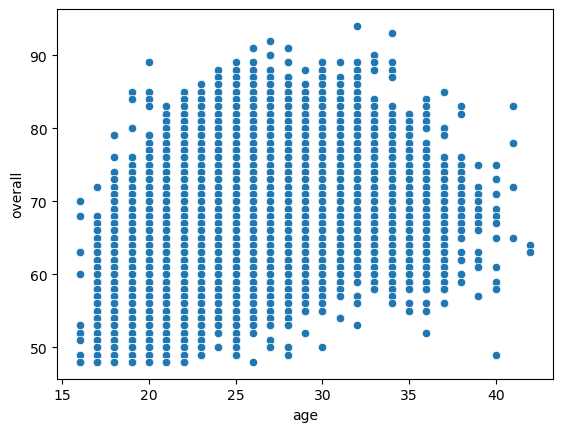

In [11]:
sns.scatterplot(x='age',y='overall',data=data)

After the age of 28 overall performance of player decreases so after age of 28 player stops improving.

3. Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 

In [13]:
data3=data[['player_positions','wage_eur']]

In [14]:
data3.head()

player_positions  wage_eur
0       RW, CF, ST    565000
1           ST, LW    405000
2          LW, CAM    290000
3               GK    125000
4           LW, CF    470000

In [16]:
data3.sort_values(by='wage_eur', ascending=False, inplace=True)
data3.head()

player_positions  wage_eur
0        RW, CF, ST    565000
4            LW, CF    470000
1            ST, LW    405000
22       CF, ST, LW    370000
5           CAM, CM    370000

* The player whose payer_position combination is Right winger, Center forward and Striker are getting paid most which is 56500 eur.
* The player whose payer_position combination is left winger and Center forward  are getting paid most which is 470000 eur.
* The player whose payer_position combination is Striker and left winger are getting paid most which is 405000 eur.
